# Author : Ratndeep Chavan
# Organization : The Spark Foundation (GRIP)
# Internship : Data Science & Business Analytics
# Task 4 : Exploratory Data Analysis (EDA)
# Task Level : Intermediate
## Task To perform : Perform EDA on given dataset (global terrorism) and find hot zones, security issues and other useful insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin')
df.shape

(181691, 135)

In [3]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

# Finding duplicate values

In [4]:
df.duplicated().sum()

0

### Data don't have any duplicate values.

In [5]:
pd.set_option('display.max_columns', None)

df.head(10)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   
5  197001010002   1970       1     1        NaN         0        NaN      217   
6  197001020001   1970       1     2        NaN         0        NaN      218   
7  197001020002   1970       1     2        NaN         0        NaN      217   
8  197001020003   1970       1     2        NaN         0        NaN      217   
9  197001030001   1970       1     3        NaN         0        NaN      217   

          country_txt  region                   region_txt   provstate  \
0  Dominican Republic       2  Central America & Caribbean         NaN   
1              Mexico       1                North America     Federal   
2         Philippines       5               Southeast Asia      Tarlac   
3              Greece       8               Western Europe      Attica   
4               Japan       4                    East Asia     Fukouka   
5       United States       1                North America    Illinois   
6             Uruguay       3                South America  Montevideo   
7       United States       1                North America  California   
8       United States       1                North America   Wisconsin   
9       United States       1                North America   Wisconsin   

            city   latitude   longitude  specificity  vicinity  \
0  Santo Domingo  18.456792  -69.951164          1.0         0   
1    Mexico city  19.371887  -99.086624          1.0         0   
2        Unknown  15.478598  120.599741          4.0         0   
3         Athens  37.997490   23.762728          1.0         0   
4        Fukouka  33.580412  130.396361          1.0         0   
5          Cairo  37.005105  -89.176269          1.0         0   
6     Montevideo -34.891151  -56.187214          1.0         0   
7        Oakland  37.791927 -122.225906          1.0         0   
8        Madison  43.076592  -89.412488          1.0         0   
9        Madison  43.072950  -89.386694          1.0         0   

          location                                            summary  crit1  \
0              NaN                                                NaN      1   
1              NaN                                                NaN      1   
2              NaN                                                NaN      1   
3              NaN                                                NaN      1   
4              NaN                                                NaN      1   
5              NaN  1/1/1970: Unknown African American assailants ...      1   
6              NaN                                                NaN      1   
7  Edes Substation  1/2/1970: Unknown perpetrators detonated explo...      1   
8              NaN  1/2/1970: Karl Armstrong, a member of the New ...      1   
9              NaN  1/3/1970: Karl Armstrong, a member of the New ...      1   

   crit2  crit3  doubtterr  alternative   alternative_txt  multiple  success  \
0      1      1        0.0          NaN               NaN       0.0        1   
1      1      1        0.0          NaN               NaN       0.0        1   
2      1      1        0.0          NaN               NaN       0.0        1   
3      1      1        0.0          NaN               NaN       0.0        1   
4      1      1       -9.0          NaN               NaN       0.0        1   
5      1      1        0.0          NaN               NaN       0.0        1   
6      1      1        0.0          NaN               NaN       0.0        0   
7      1      1        1.0          2.0  Other Crime 

In [6]:
# Uding my personal function to get the require details

from My_functions import details
pd.set_option('display.max_rows', None)
details(df)

Counts Missing  Missing percent  Unique    Dtype  \
eventid             181691       0         0.000000  181691    int64   
iyear               181691       0         0.000000      47    int64   
imonth              181691       0         0.000000      13    int64   
iday                181691       0         0.000000      32    int64   
approxdate            9239  172452        94.914993    2244   object   
extended            181691       0         0.000000       2    int64   
resolution            2220  179471        98.778145    1859   object   
country             181691       0         0.000000     205    int64   
country_txt         181691       0         0.000000     205   object   
region              181691       0         0.000000      12    int64   
region_txt          181691       0         0.000000      12   object   
provstate           181270     421         0.231712    2855   object   
city                181257     434         0.238867   36674   object   
latitude            177135    4556         2.507554   48322  float64   
longitude           177134    4557         2.508104   48039  float64   
specificity         181685       6         0.003302       5  float64   
vicinity            181691       0         0.000000       3    int64   
location             55495  126196        69.456385   44109   object   
summary             115562   66129        36.396409  112492   object   
crit1               181691       0         0.000000       2    int64   
crit2               181691       0         0.000000       2    int64   
crit3               181691       0         0.000000       2    int64   
doubtterr           181690       1         0.000550       3  float64   
alternative          29011  152680        84.032781       5  float64   
alternative_txt      29011  152680        84.032781       5   object   
multiple            181690       1         0.000550       2  float64   
success             181691       0         0.000000       2    int64   
suicide             181691       0         0.000000       2    int64   
attacktype1         181691       0         0.000000       9    int64   
attacktype1_txt     181691       0         0.000000       9   object   
attacktype2           6314  175377        96.524869       9  float64   
attacktype2_txt       6314  175377        96.524869       9   object   
attacktype3            428  181263        99.764435       8  float64   
attacktype3_txt        428  181263        99.764435       8   object   
targtype1           181691       0         0.000000      22    int64   
targtype1_txt       181691       0         0.000000      22   object   
targsubtype1        171318   10373         5.709144     112  float64   
targsubtype1_txt    171318   10373         5.709144     112   object   
corp1               139141   42550        23.418882   33238   object   
target1             181055     636         0.350045   86006   object   
natlty1             180132    1559         0.858050     215  float64   
natlty1_txt         180132    1559         0.858050     215   object   
targtype2            11144  170547        93.866510      22  float64   
targtype2_txt        11144  170547        93.866510      22   object   
targsubtype2         10685  171006        94.119136     107  float64   
targsubtype2_txt     10685  171006        94.119136     107   object   
corp2                10117  171574        94.431755    2691   object   
target2              11020  170671        93.934757    5043   object   
natlty2              10828  170863        94.040431     158  float64   
natlty2_txt          10828  170863        94.040431     158   object   
targtype3             1176  180515        99.352747      20  float64   
targtype3_txt         1176  180515        99.352747      20   object   
targsubtype3          1097  180594        99.396228      92  float64   
targsubtype3_txt      1097  180594        99.396228      92   object   
corp3                 1026  180665        99.435305     422 

### Some column name has extension as '_txt' 
### Other details for those columns are same incating both column has same info in numerical and text format

In [7]:
x = pd.DataFrame(columns=[['Text','Counts','Numeric','Counts']])
col = []
for i in df.columns:
    if '_txt' in str(i):
        c1 = list(df[i].value_counts().index[:])
        c2 = list(df[i].value_counts().values[:])
        c3 = list(df[i.split('_')[:-1]].value_counts().index[:])
        c4 = list(df[i.split('_')[:-1]].value_counts().values[:])
        for c in range(0,len(c1)):
            x.loc[i+str(c)] = (c1[c],c2[c],c3[c],c4[c])
        col.append(i)

print(len(col))
x

28


Text Counts  \
country_txt0                                                      Iraq  24636   
country_txt1                                                  Pakistan  14368   
country_txt2                                               Afghanistan  12731   
country_txt3                                                     India  11960   
country_txt4                                                  Colombia   8306   
country_txt5                                               Philippines   6908   
country_txt6                                                      Peru   6096   
country_txt7                                               El Salvador   5320   
country_txt8                                            United Kingdom   5235   
country_txt9                                                    Turkey   4292   
country_txt10                                                  Somalia   4142   
country_txt11                                                  Nigeria   3907   
country_txt12                                                 Thailand   3849   
country_txt13                                                    Yemen   3347   
country_txt14                                                    Spain   3249   
country_txt15                                                Sri Lanka   3022   
country_txt16                                            United States   2836   
country_txt17                                                  Algeria   2743   
country_txt18                                                   France   2693   
country_txt19                                                    Egypt   2479   
country_txt20                                                  Lebanon   2478   
country_txt21                                                    Chile   2365   
country_txt22                                                    Libya   2249   
country_txt23                                 West Bank and Gaza Strip   2227   
country_txt24                                                    Syria   2201   
country_txt25                                                   Russia   2194   
country_txt26                                                   Israel   2183   
country_txt27                                                Guatemala   2050   
country_txt28                                             South Africa   2016   
country_txt29                                                Nicaragua   1970   
country_txt30                                                  Ukraine   1709   
country_txt31                                               Bangladesh   1648   
country_txt32                                                    Italy   1565   
country_txt33                                                   Greece   1275   
country_txt34                                                    Nepal   1215   
country_txt35                                                    Sudan    967   
country_txt36                                                Argentina    815   
country_txt37                         Democratic Republic of the Congo    775   
country_txt38                                                Indonesia    761   
country_txt39                                                  Germany    735   
country_txt40                                                     Iran    684   
country_txt41                                                    Kenya    683   
country_txt42                                                  Burundi    613   
country_txt43                                                     Mali    566   
country_txt44                                                  Myanmar    546   
country_txt45                                       West Germany (FRG)    541   
country_txt46                                                   Mexico    524   
country_txt47                                                   Angola    499   
country_txt48                                                    Japan    402   
country_txt49   

#### From above observation it's clear that this 28 columns are repeating same information in dataset. As only analysis is requirement it's convenient to drop columns having numerical values

In [8]:
df1 = df.copy()

for i in df.columns:
    if '_txt' in i:
        df = df.drop(i.split('_')[:-1], axis=1)
df.shape

(181691, 107)

In [9]:
df.head(20)

eventid  iyear  imonth  iday approxdate  extended resolution  \
0   197000000001   1970       7     2        NaN         0        NaN   
1   197000000002   1970       0     0        NaN         0        NaN   
2   197001000001   1970       1     0        NaN         0        NaN   
3   197001000002   1970       1     0        NaN         0        NaN   
4   197001000003   1970       1     0        NaN         0        NaN   
5   197001010002   1970       1     1        NaN         0        NaN   
6   197001020001   1970       1     2        NaN         0        NaN   
7   197001020002   1970       1     2        NaN         0        NaN   
8   197001020003   1970       1     2        NaN         0        NaN   
9   197001030001   1970       1     3        NaN         0        NaN   
10  197001050001   1970       1     1        NaN         0        NaN   
11  197001060001   1970       1     6        NaN         0        NaN   
12  197001080001   1970       1     8        NaN         0        NaN   
13  197001090001   1970       1     9        NaN         0        NaN   
14  197001090002   1970       1     9        NaN         0        NaN   
15  197001100001   1970       1    10        NaN         0        NaN   
16  197001110001   1970       1    11        NaN         0        NaN   
17  197001120001   1970       1    12        NaN         0        NaN   
18  197001120002   1970       1    12        NaN         0        NaN   
19  197001130001   1970       1    13        NaN         0        NaN   

           country_txt                   region_txt    provstate  \
0   Dominican Republic  Central America & Caribbean          NaN   
1               Mexico                North America      Federal   
2          Philippines               Southeast Asia       Tarlac   
3               Greece               Western Europe       Attica   
4                Japan                    East Asia      Fukouka   
5        United States                North America     Illinois   
6              Uruguay                South America   Montevideo   
7        United States                North America   California   
8        United States                North America    Wisconsin   
9        United States                North America    Wisconsin   
10       United States                North America    Wisconsin   
11       United States                North America     Colorado   
12               Italy               Western Europe        Lazio   
13       United States                North America     Michigan   
14       United States                North America  Puerto Rico   
15  East Germany (GDR)               Eastern Europe       Berlin   
16            Ethiopia           Sub-Saharan Africa      Unknown   
17       United States                North America     New York   
18       United States                North America  Puerto Rico   
19       United States                North America   Washington   

             city   latitude   longitude  specificity  vicinity  \
0   Santo Domingo  18.456792  -69.951164          1.0         0   
1     Mexico city  19.371887  -99.086624          1.0         0   
2         Unknown  15.478598  120.599741          4.0         0   
3          Athens  37.997490   23.762728          1.0         0   
4         Fukouka  33.580412  130.396361          1.0         0   
5           Cairo  37.005105  -89.176269          1.0         0   
6      Montevideo -34.891151  -56.187214          1.0         0   
7         Oakland  37.791927 -122.225906          1.0         0   
8         Madison  43.076592  -89.412488          1.0         0   
9         Madison  43.072950  -89.386694          1.0         0   
10        Baraboo  43.468500  -89.744299          1.0         0   
11         Denver  39.758968 -104.876305          1.0         0   
12           Rome  41.890961   12.490069          1.0         0   
13        Detroit  42.331685  -83.047924          1.0         0   
14    Rio Piedras  18.386932  -66.061127 

### As there's no specification of data it's necessary to understand what kind of data each column have.

Using 'summary', 'propcomment', 'addnote' columns to understand the data of every columns by changing variable i

In [10]:
pd.set_option('display.max_colwidth', -1)
i = 'related'
col = ['summary','propcomment','addnotes']
col.append(i)
df[col].dropna(subset=[i]).head(500)

summary  \
36    1/30/1970: In a series of two incidents that were possibly related, unknown perpetrators detonated an explosive device at a building in South Sioux City, Nebraska, United States.  There were no casualties but the blast damaged the foundation of the building.  This attack was one of many instances of violence in South Sioux City during the Iowa Beef Packers strike.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
37    1/30/1970: In a series of two incidents that were possibly related, unknown perpetrators detonated an explosive device at the A & B Boat Shop in South Sioux City, Nebraska, United States.  There were no casualties but the blast caused $2,500 in damages.  This attack was one of many instances of violence in South Sioux City during the Iowa Beef Packers strike.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
44    2/3/1970: In a series of related attacks, an incendiary device was discovered and dismantled at Alexander's Department Store in the Bronx, New York, United States.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [11]:
# Loop can be use for same but it'll take while as dataset is big

# pd.set_option('display.max_colwidth', -1)
# col = ['summary','propcomment','addnotes']

# for i in df.columns:
#     if i.isin(col):
#         pass
#     else :
#         col.append(i)
#         df[col].dropna(subset=[i]).head(500)

## Columns details

##### iyear
Year when incident occurred.

##### imonth
Month when incident occurred.

##### iday
Day when incident occurred.

##### approxdate
Approximate date of incident.

##### extended
1 = "Yes" incident extended more than 24 hours. 

0 = "No" incident extended less than 24 hours.

##### resolution
Date when incident resolved.

##### country_txt
Country where the incident occurred.

##### region_txt
Region where the incident occurred.

##### provstate
State where the incident occurred.

##### city
City where the incident occurred.

##### latitude
Latitude of the city.

##### longitude
Longitude of the city.

##### summary
Incident summary

##### multiple
Incident occure with multiple series.

##### success
Success of terrorist strike

##### suicide
1 = "Yes" for suicide attack. 

0 = "No"

##### attacktype1_txt
The method of attack.

##### targtype1_txt
The target

##### targsubtype1_txt
Specific target category

##### natlty1_txt
Target's nationality

##### gname
Name of attackers group

##### gsubname
More details on group name

##### motive
Attack motive

##### nperps
Number of terrorists

##### nperpcap
Number of terrorists capture

##### weaptype1_txt
Weapon used.

##### weapsubtype1_txt
More detail of weapon types

##### nkill
Number of total killed

##### nkillus
Number citizens killed

##### nkillter
Number terrorist killed

##### nwound
Number of total wounded

##### nwoundus
Number of citizens wounded

##### nwoundte
Number of terrorist wounded


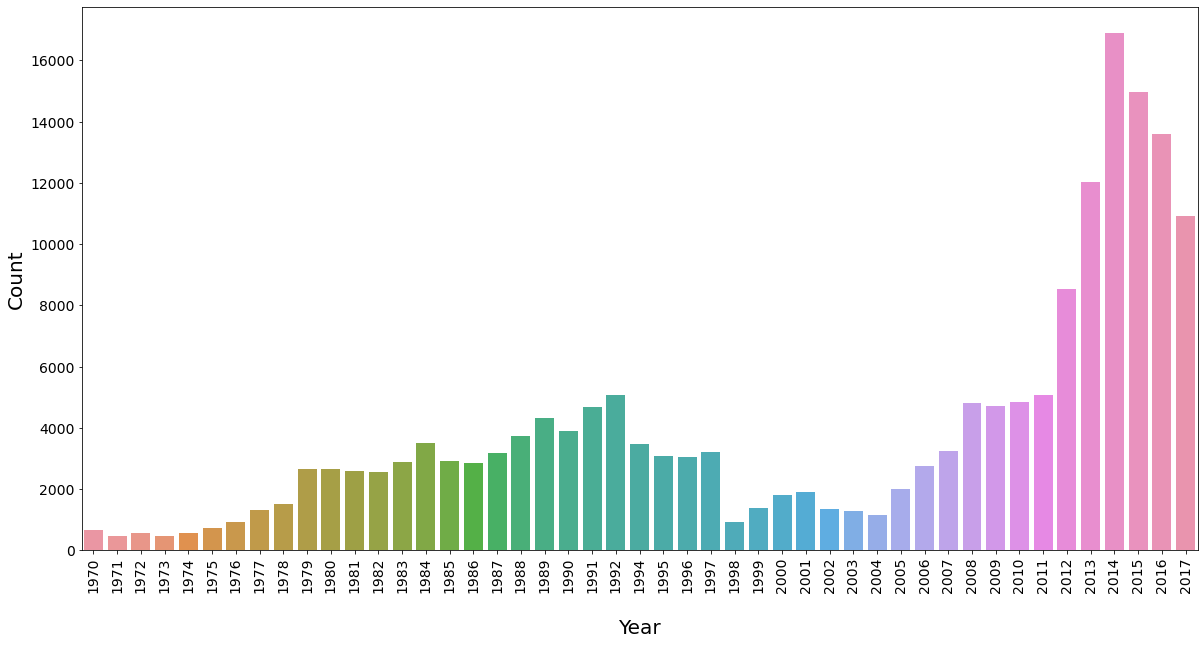

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df['iyear'])
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('\nYear',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [13]:
col = [1970,1979,1998,2005,2012,2018]

for p in range(1,len(col)):
    x = 0
    c = 0
    for i in range(col[p-1],col[p]):
        if i != 1993:
            x += df['iyear'].value_counts()[i]
            c += 1
    
    print(f'Average incident occured from {col[p-1]} to {col[p]-1} : {x/c}')

Average incident occured from 1970 to 1978 : 805.7777777777778
Average incident occured from 1979 to 1997 : 3347.5
Average incident occured from 1998 to 2004 : 1403.7142857142858
Average incident occured from 2005 to 2011 : 3920.714285714286
Average incident occured from 2012 to 2017 : 12818.833333333334


### Above graph shows that from 1970 to 1978 minimum incident occurred then from 1979 to 1997 incidents was medium which is fall down from 1998 to 2004 and start to increase slightly from 2005 to 2011 but from 2012  onwards it incresed massively which is more than 3 times of incident occurred in history where 2014 is a peak point.

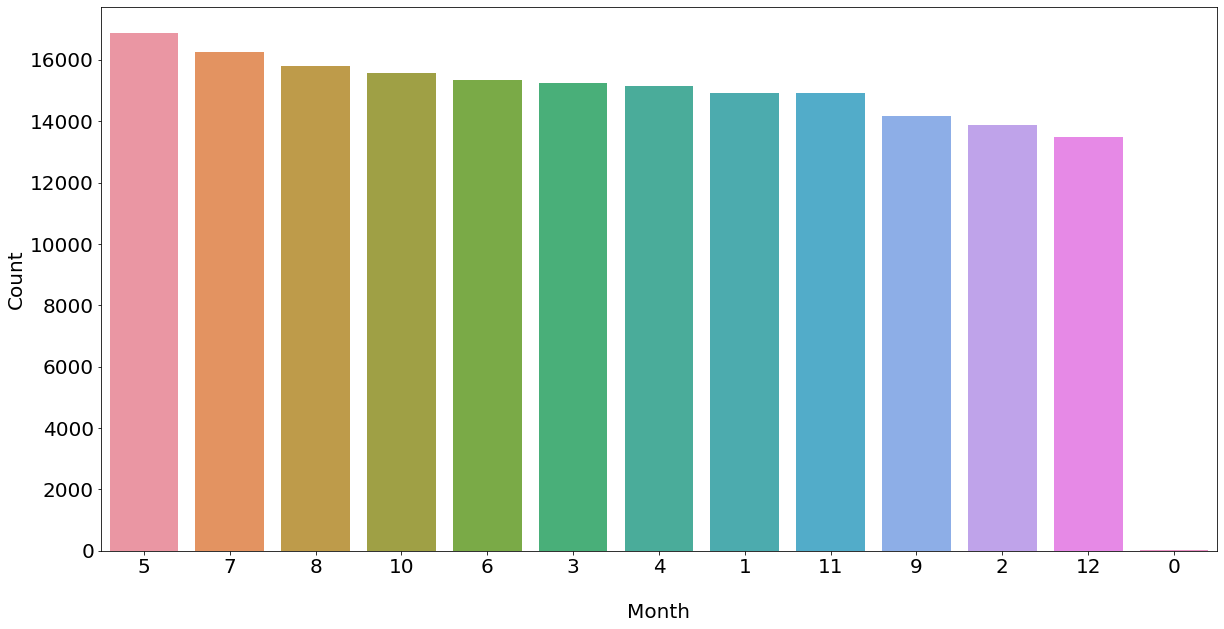

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df['imonth'], order=df['imonth'].value_counts().index)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nMonth',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

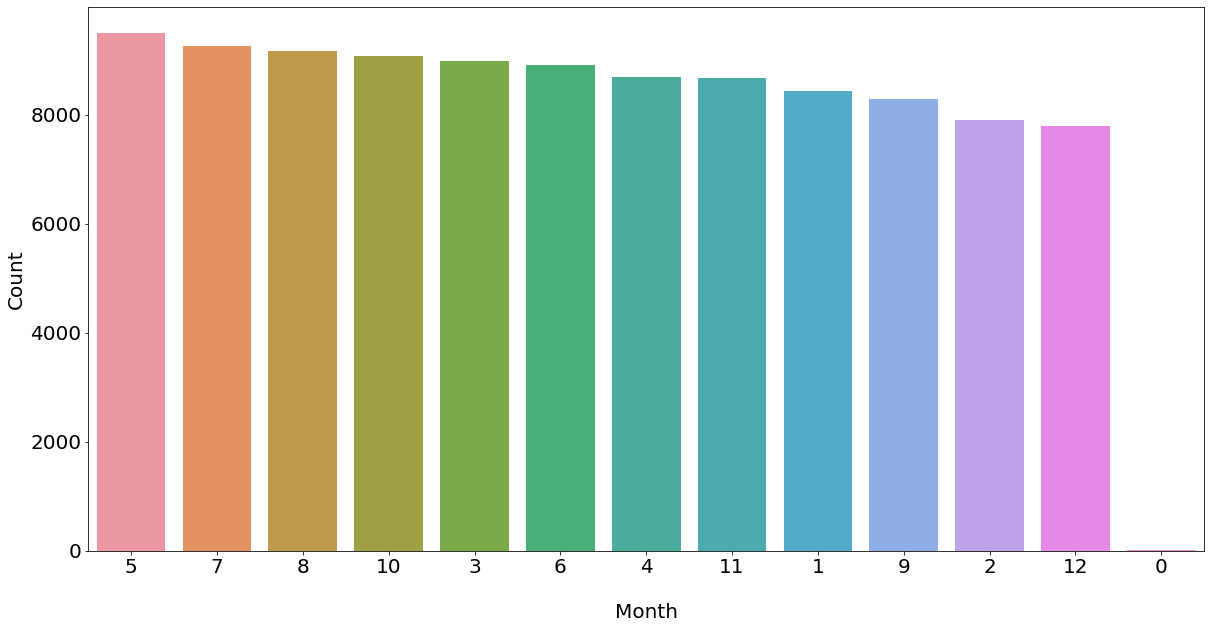

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(df[df['iyear']<=2011]['imonth'], order=df[df['iyear']<=2011]['imonth'].value_counts().index)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nMonth',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

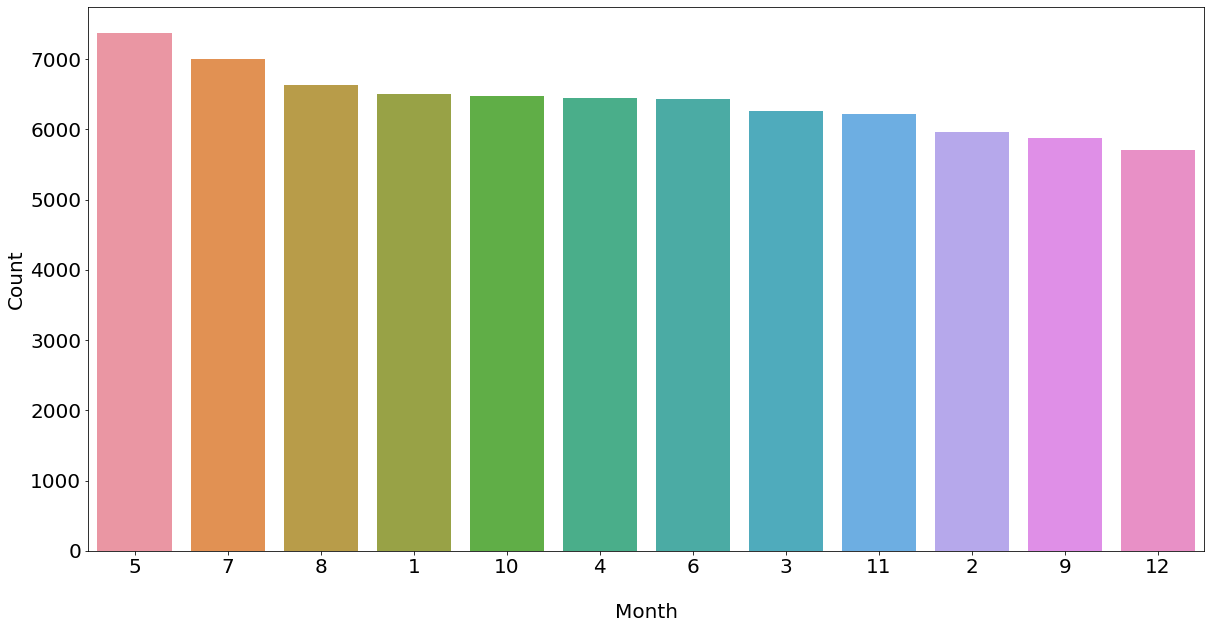

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df[df['iyear']>2011]['imonth'], order=df[df['iyear']>2011]['imonth'].value_counts().index)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nMonth',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

### After year 2011 incident occured in first month of the year are increased.

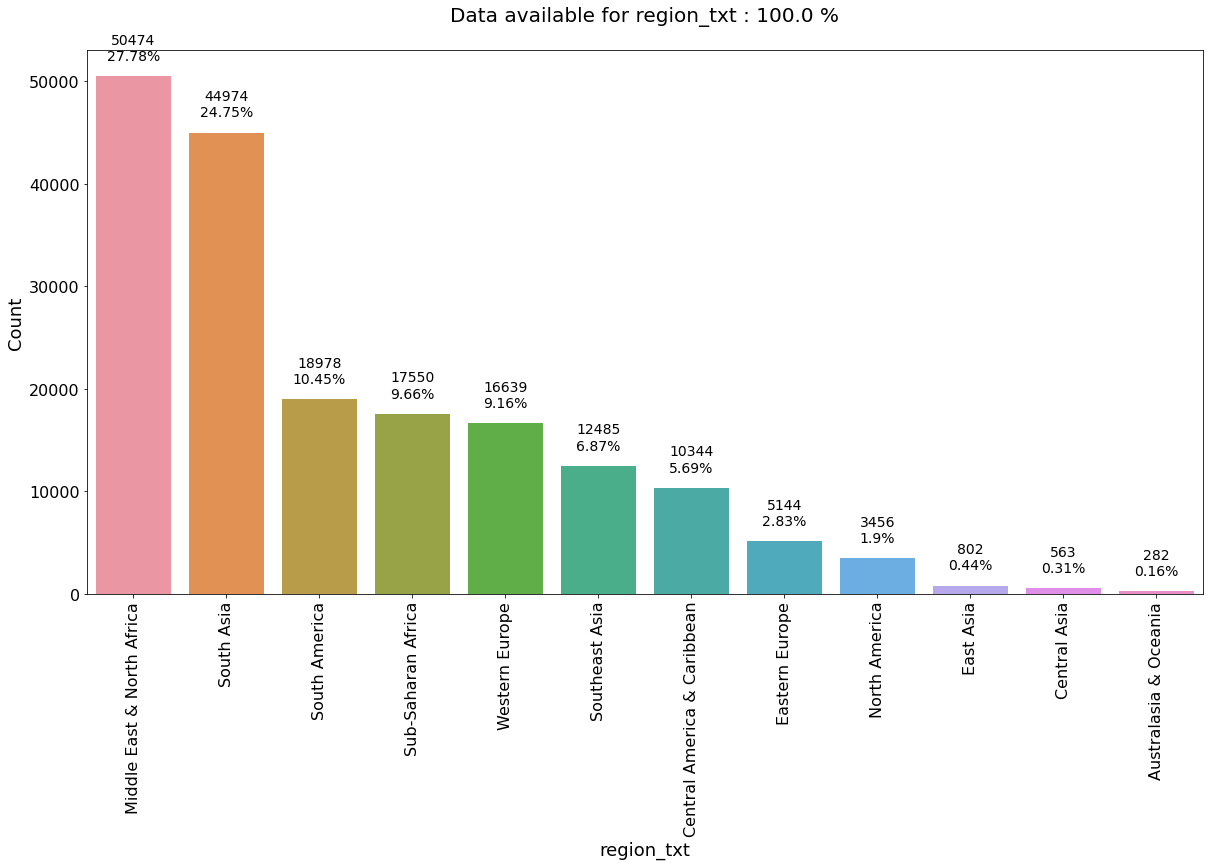

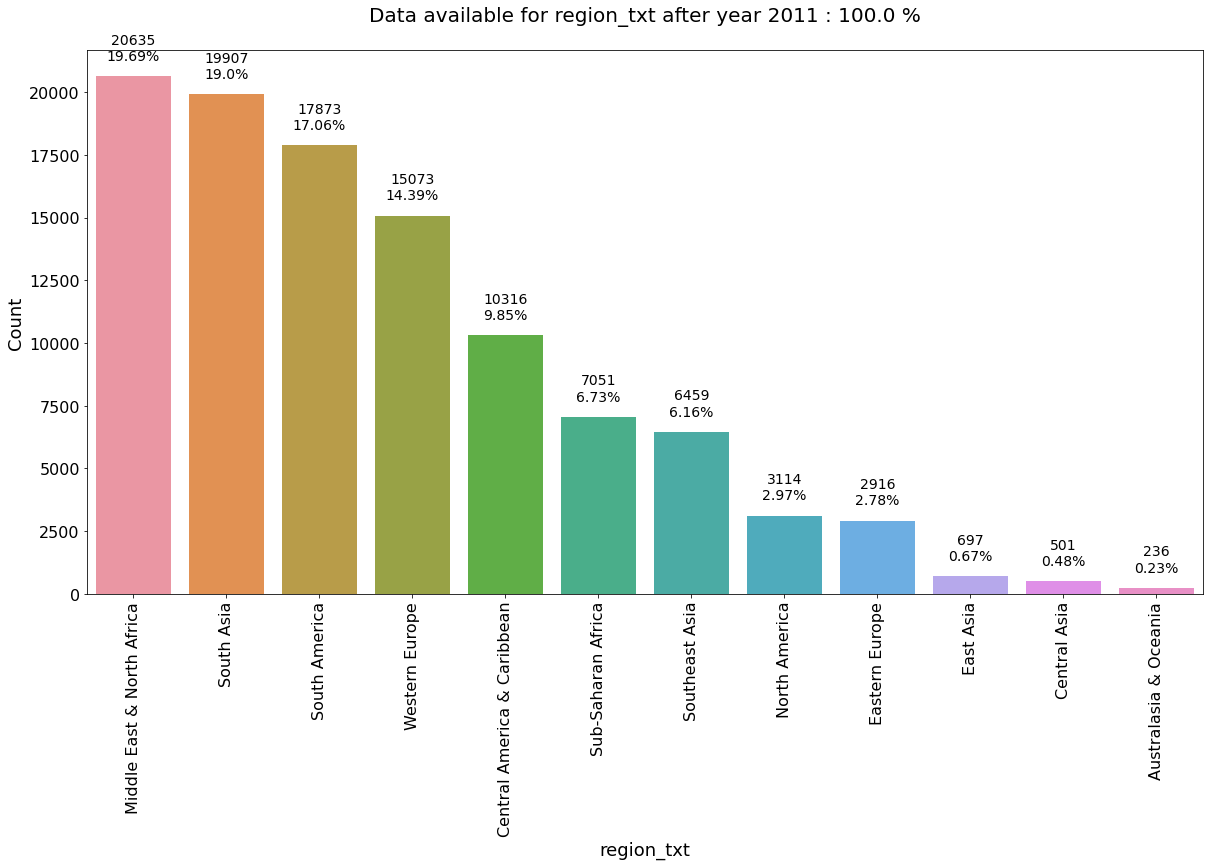

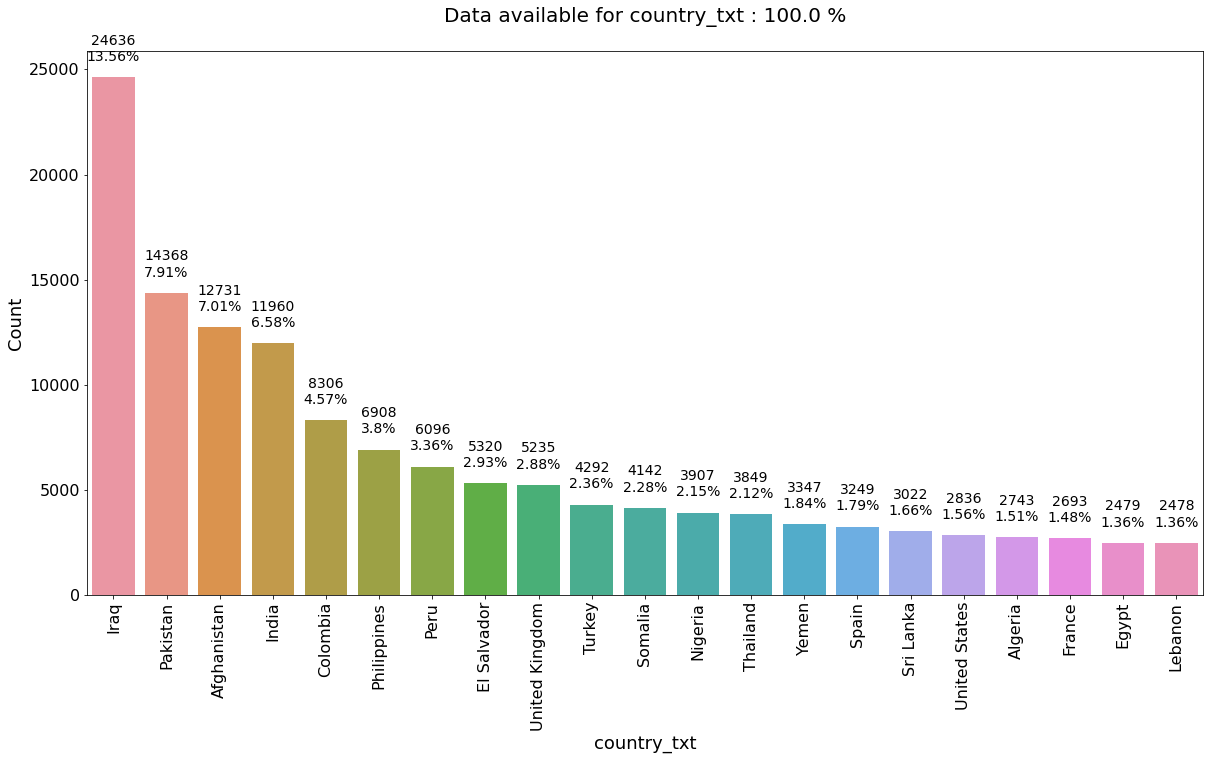

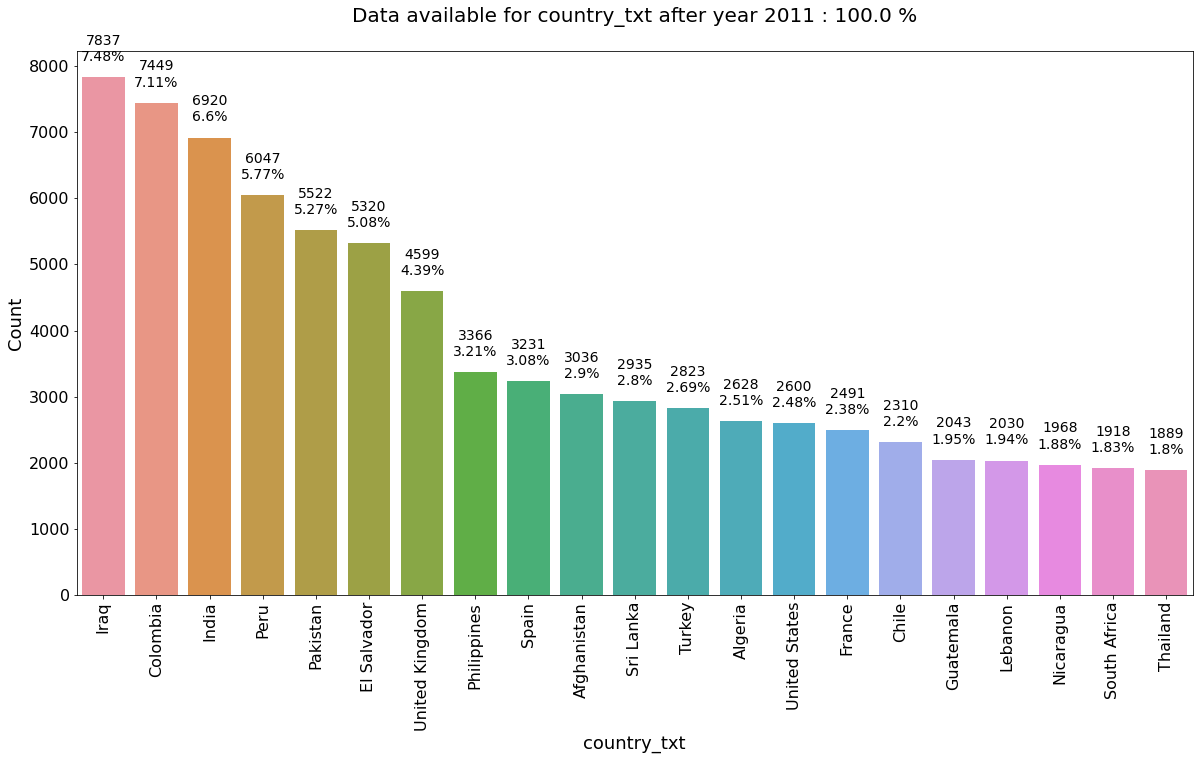

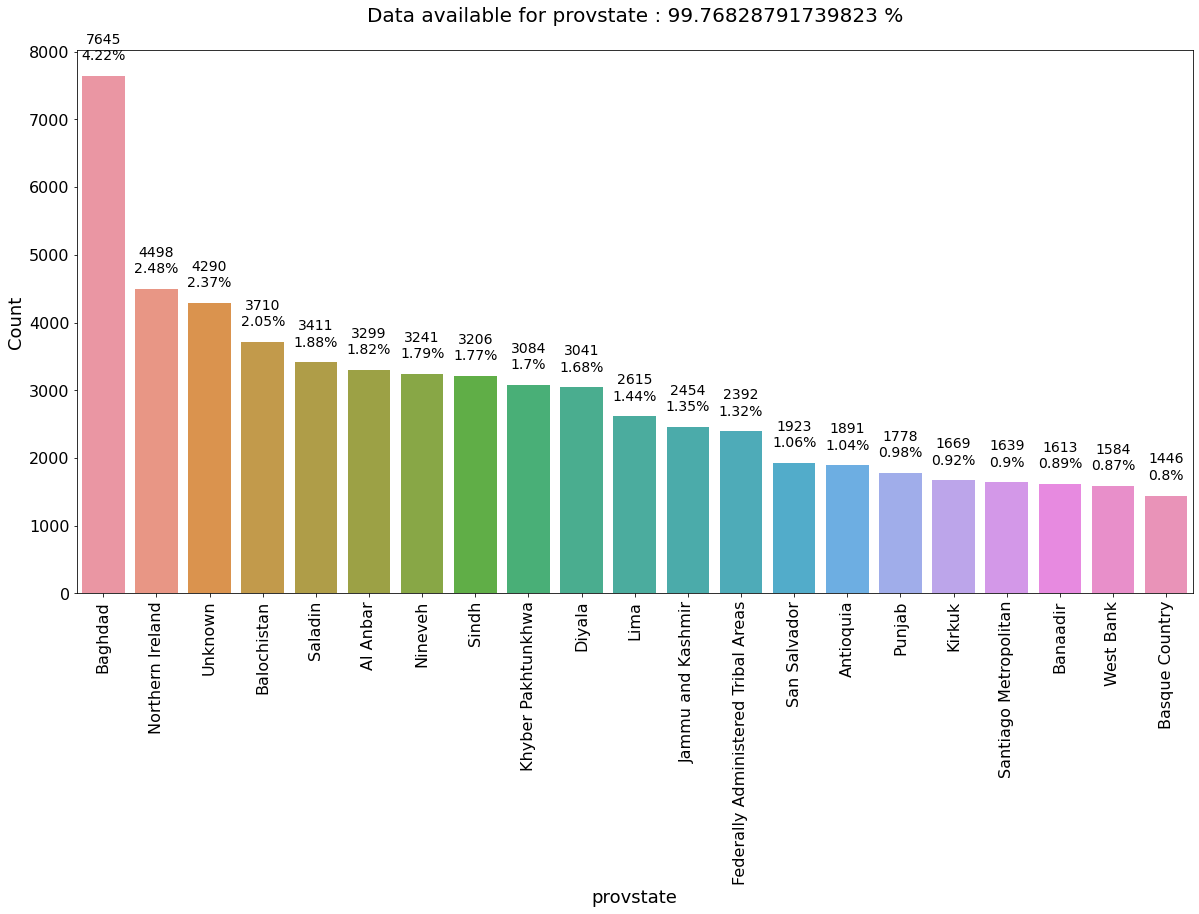

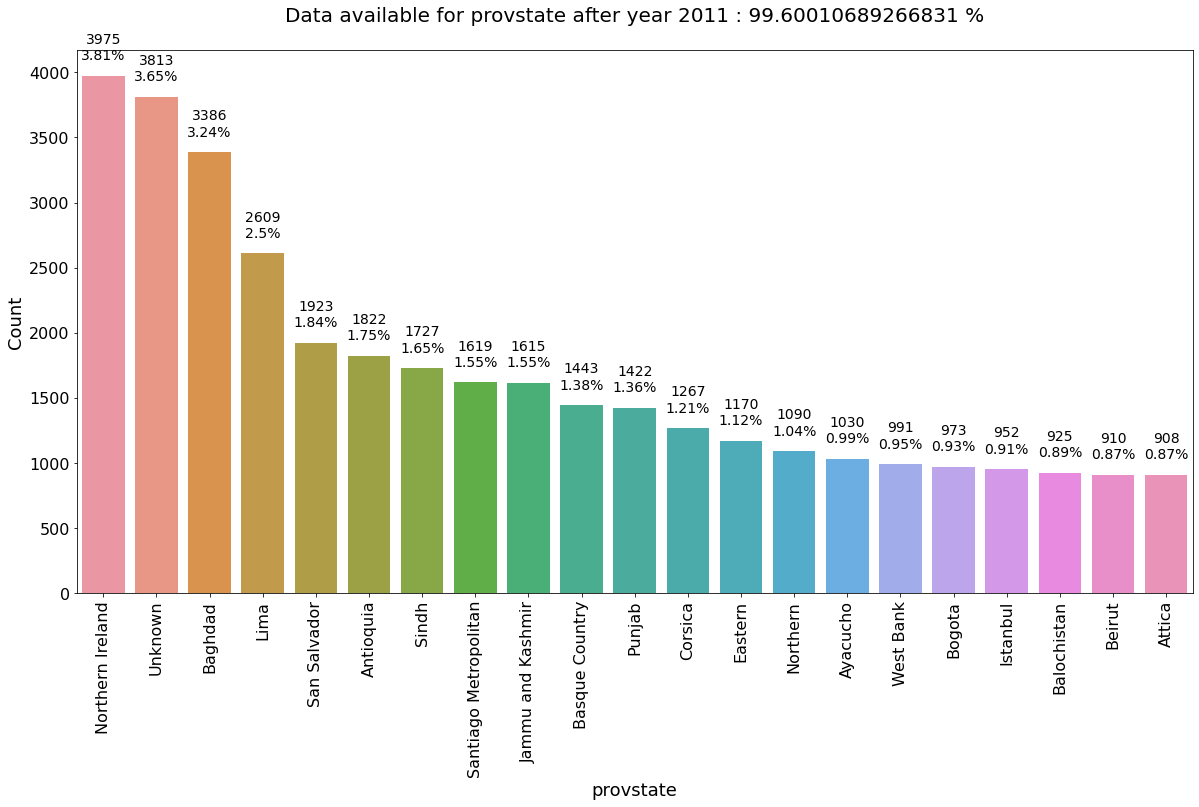

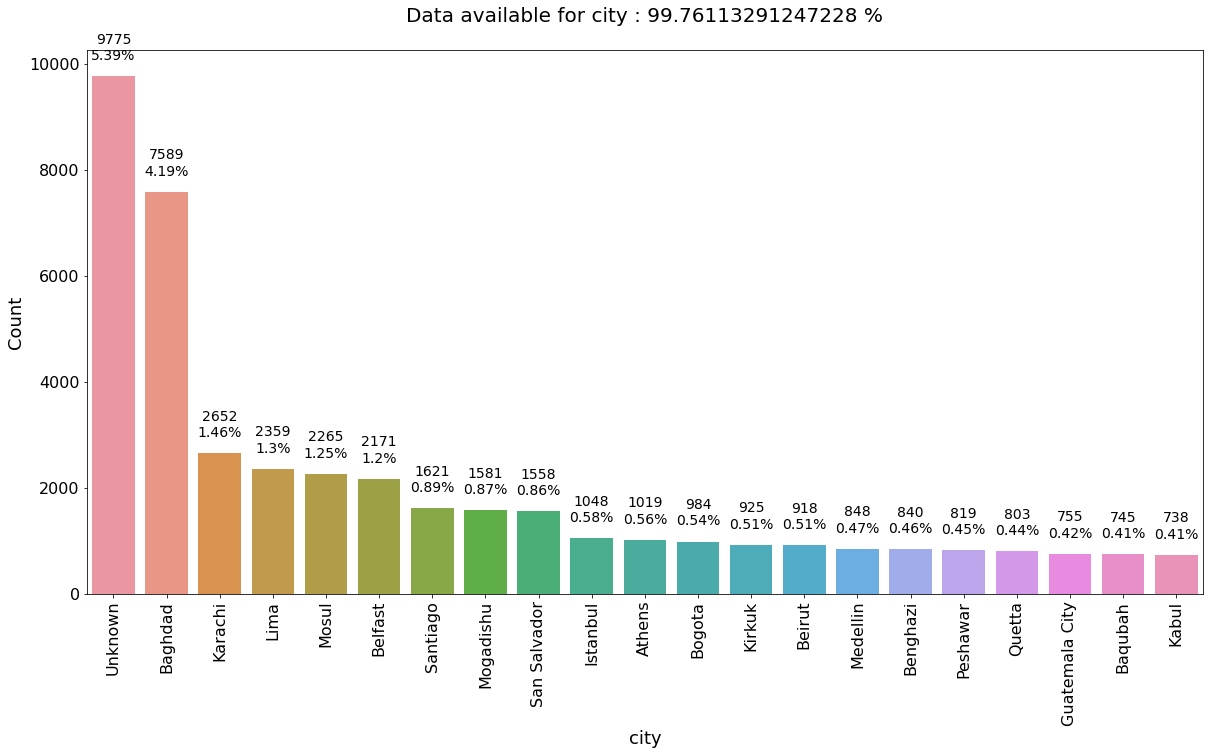

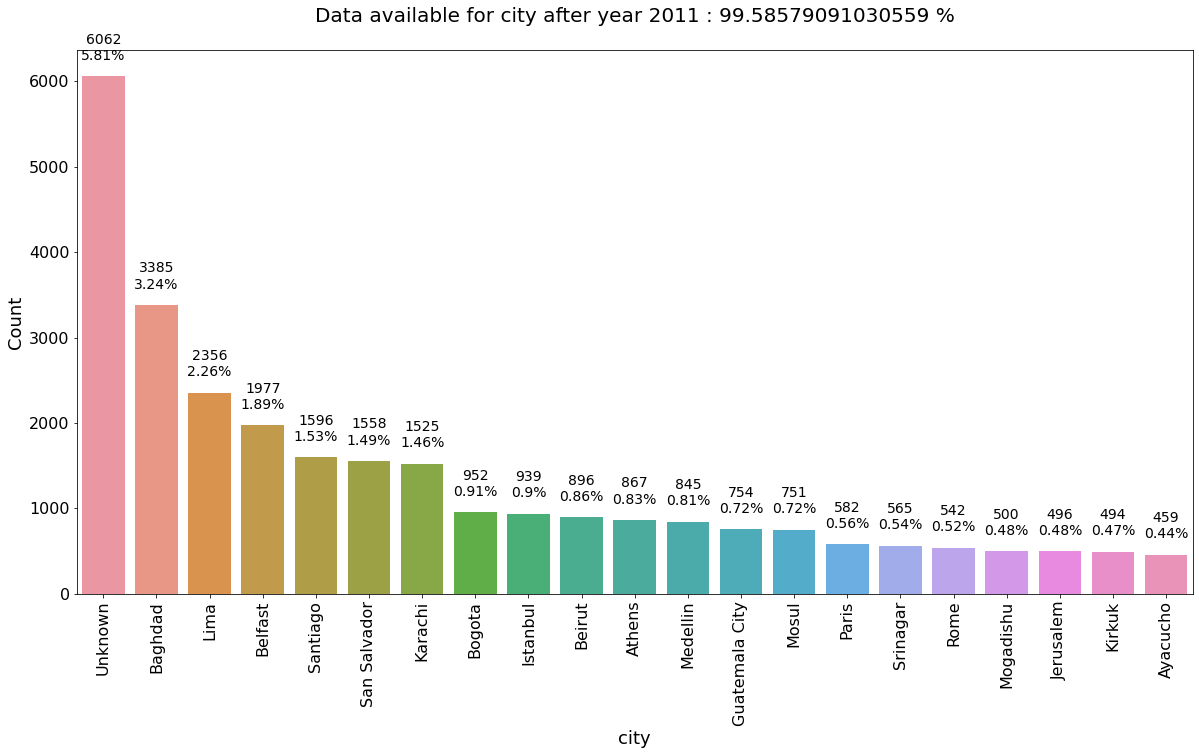

In [17]:
col = ['region_txt', 'country_txt', 'provstate', 'city']
c=0
y = df[df['iyear']<=2011]

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=14, ha='center')
    plt.show()

    txt = f'Data available for {i} after year 2011 : {(y[i].count()/len(y))*100} %\n'
    x = y[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(y[y[i].isin(x)][i], order=y[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/y[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=14, ha='center')
    plt.show()

### Observations:

1. Appx. 50% incident occurred in middle east & north america and south asia region where middle east & north America is highest
2. In top country i.e. Iraq, Pakistan, Afghanistan, India, Colombia appx. 40% incident occurred where Iraq is highest. But after 2011 incidents in Colombia and Peru increased and in Afghanistan decreased.
3. Bagdad is highest city where appx. 5% incident occurred. But after 2011 incidents in Northern Ireland also increased.

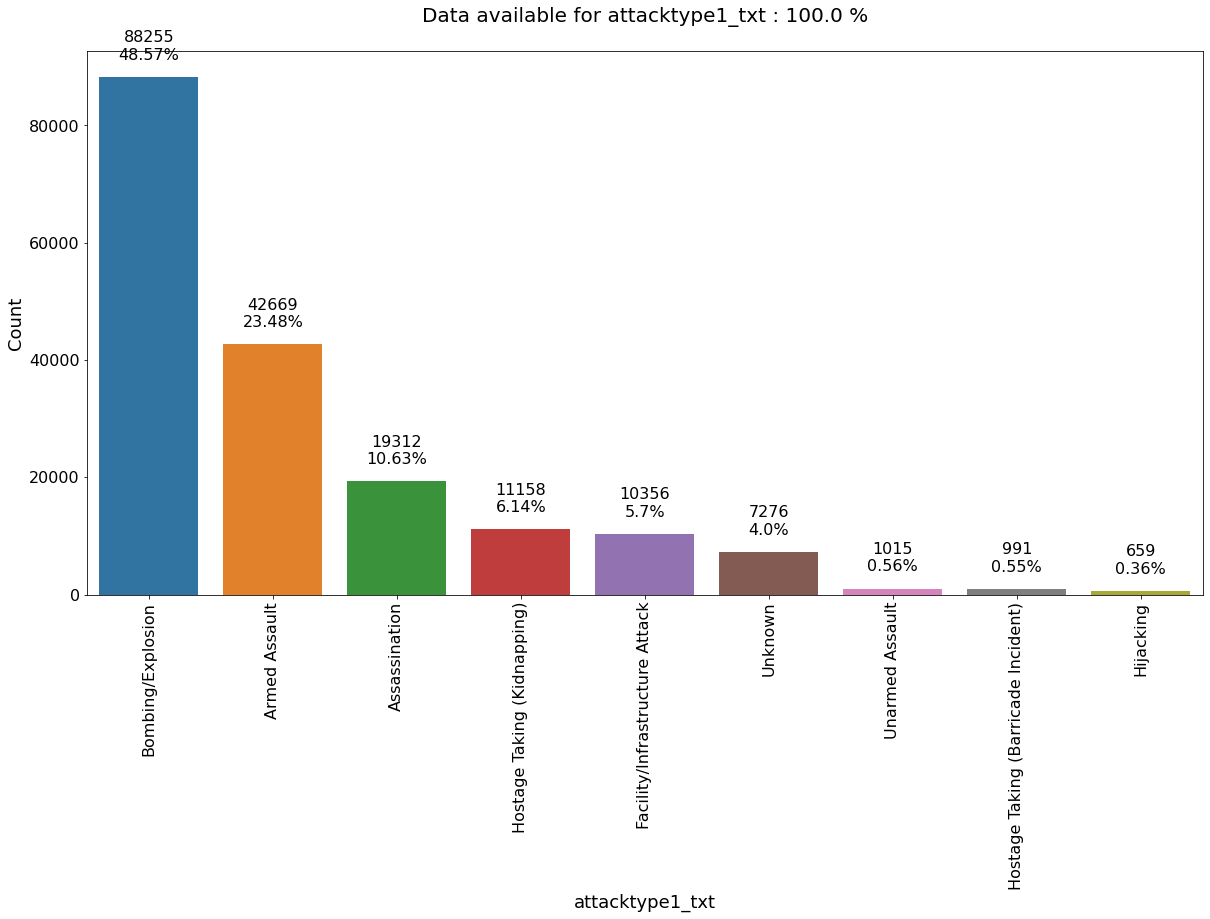

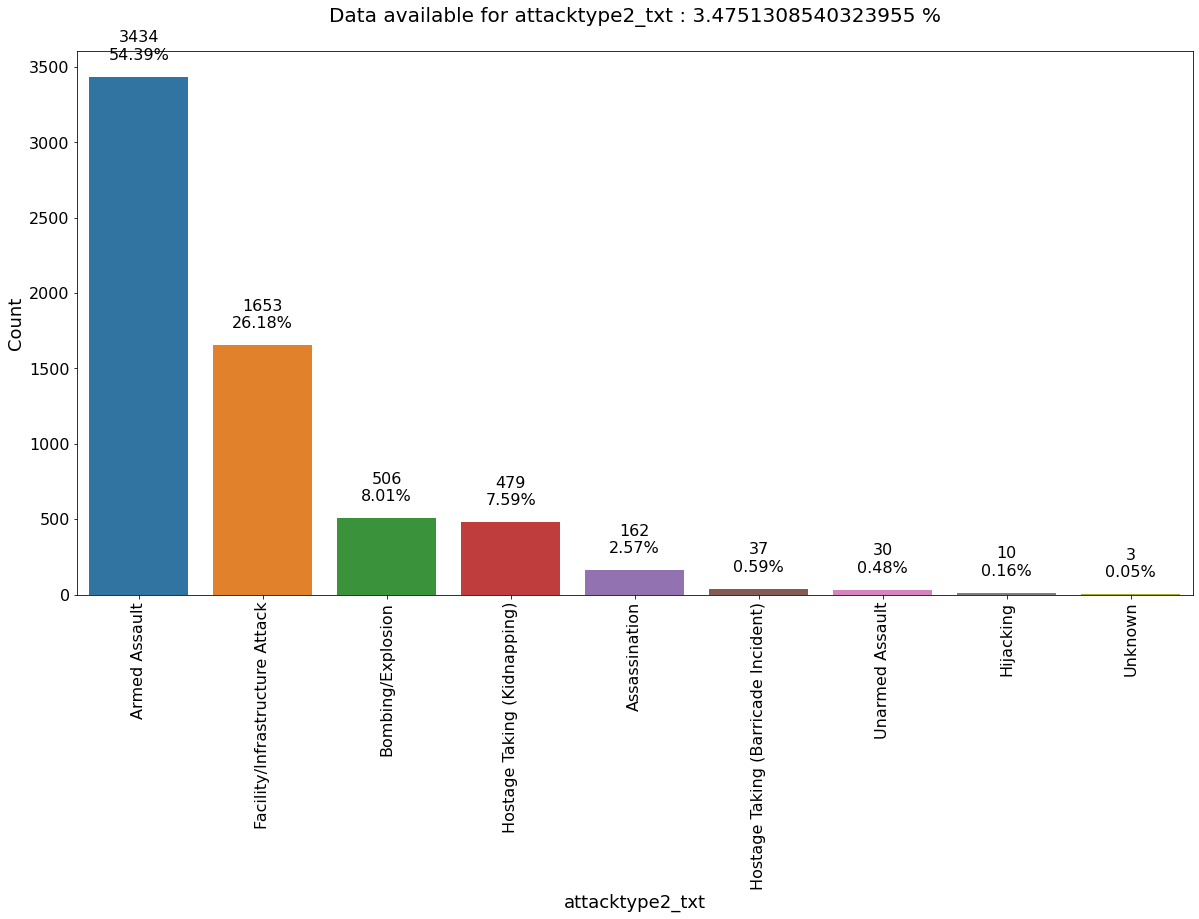

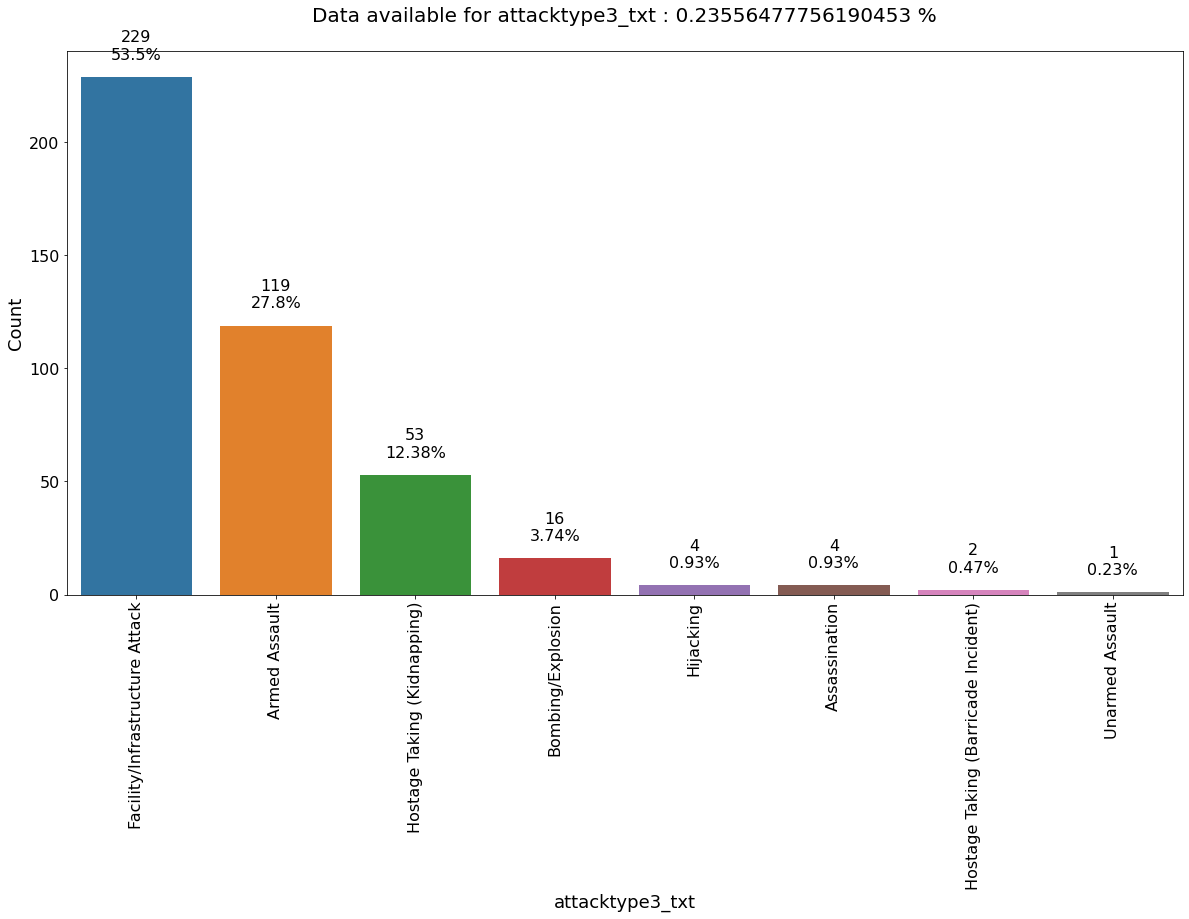

In [18]:
col = ['attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

### Observations :

1. In attacktype 1 50% attacks are Bombing/Explosion and nearly 25 % are Armed Assualt
2. In attacktype 2 from available 3.5% data more than 50% attcks are Armed Assualt and more than 25 % are Facility/Infrastructure attack
3. In attacktype 2 from available 0.2% data more than 50% attcks are Facility/Infrastructure attack and more than 25 % are Armed Assualt.

##### Comparing overall count nearly 50% attack are Bombing/Explosion and 25 % is Armed Assualt 

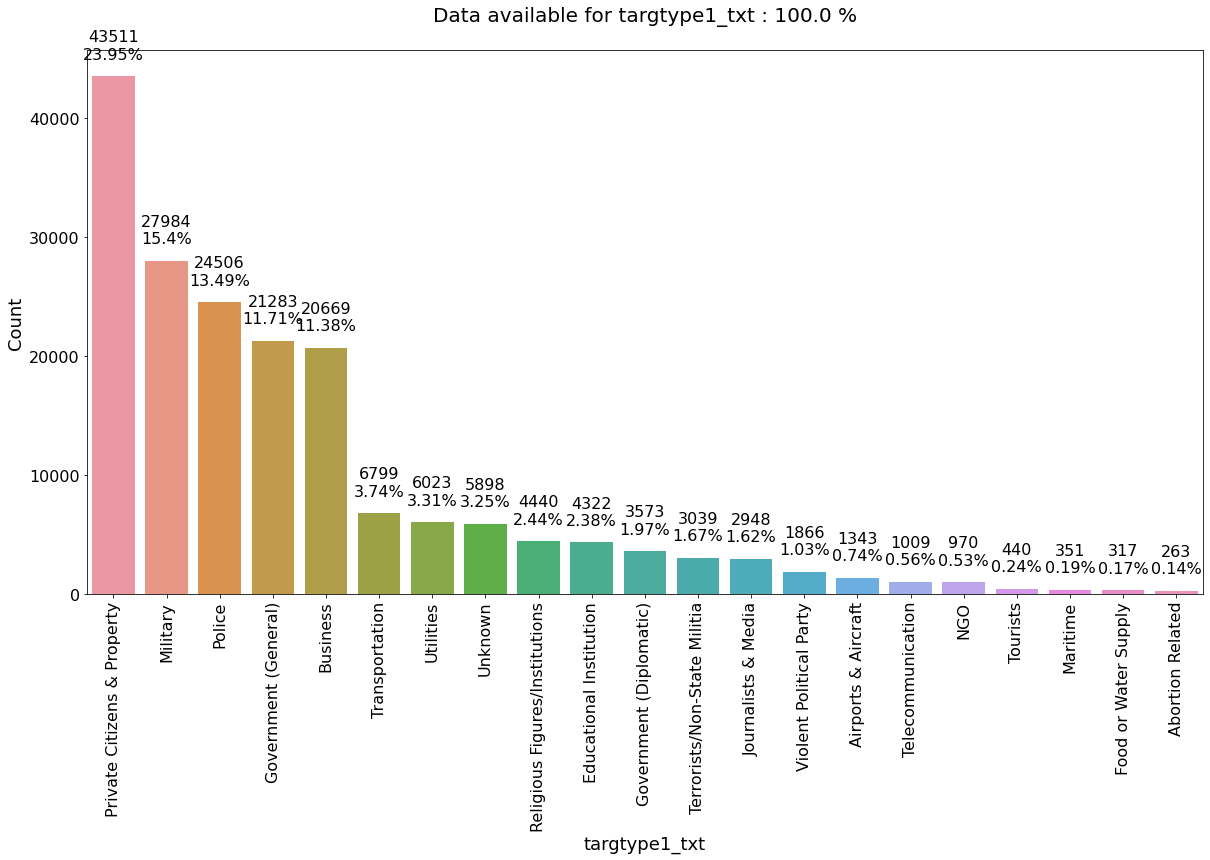

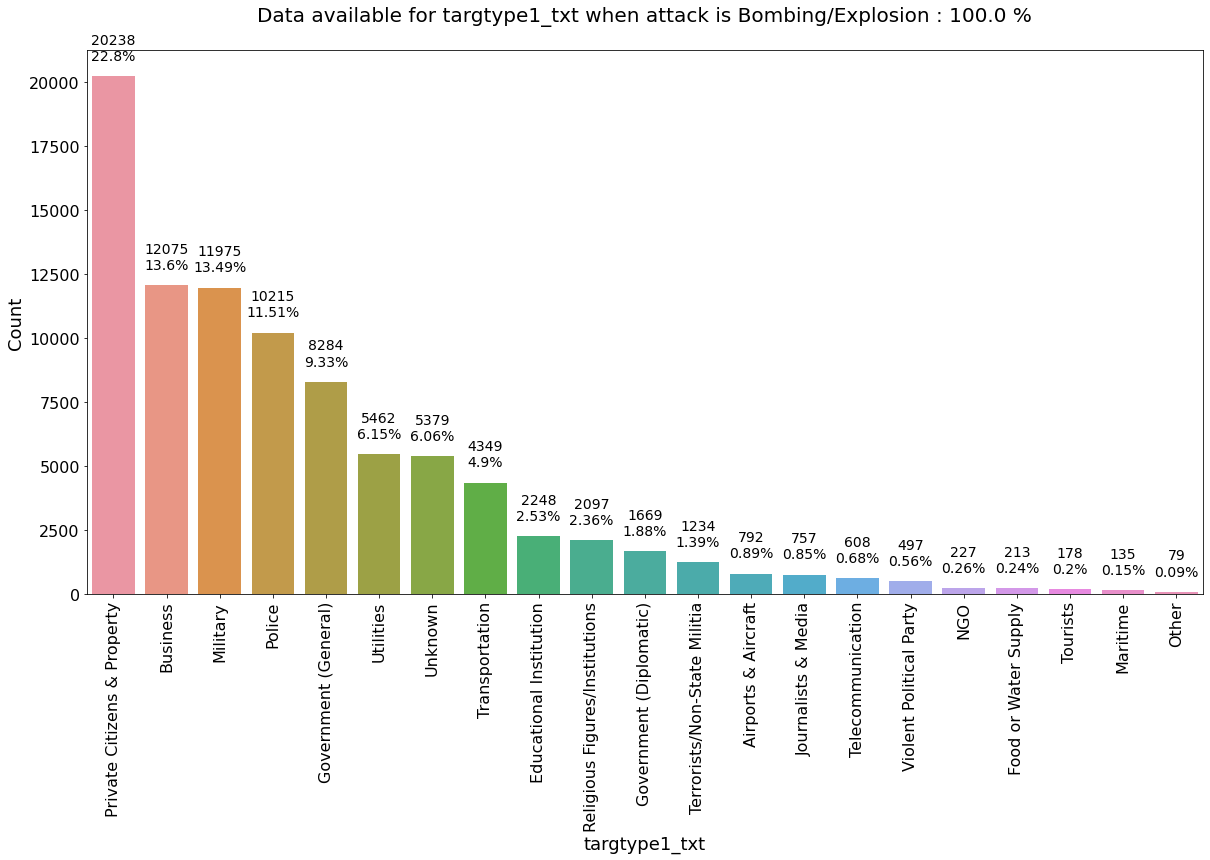

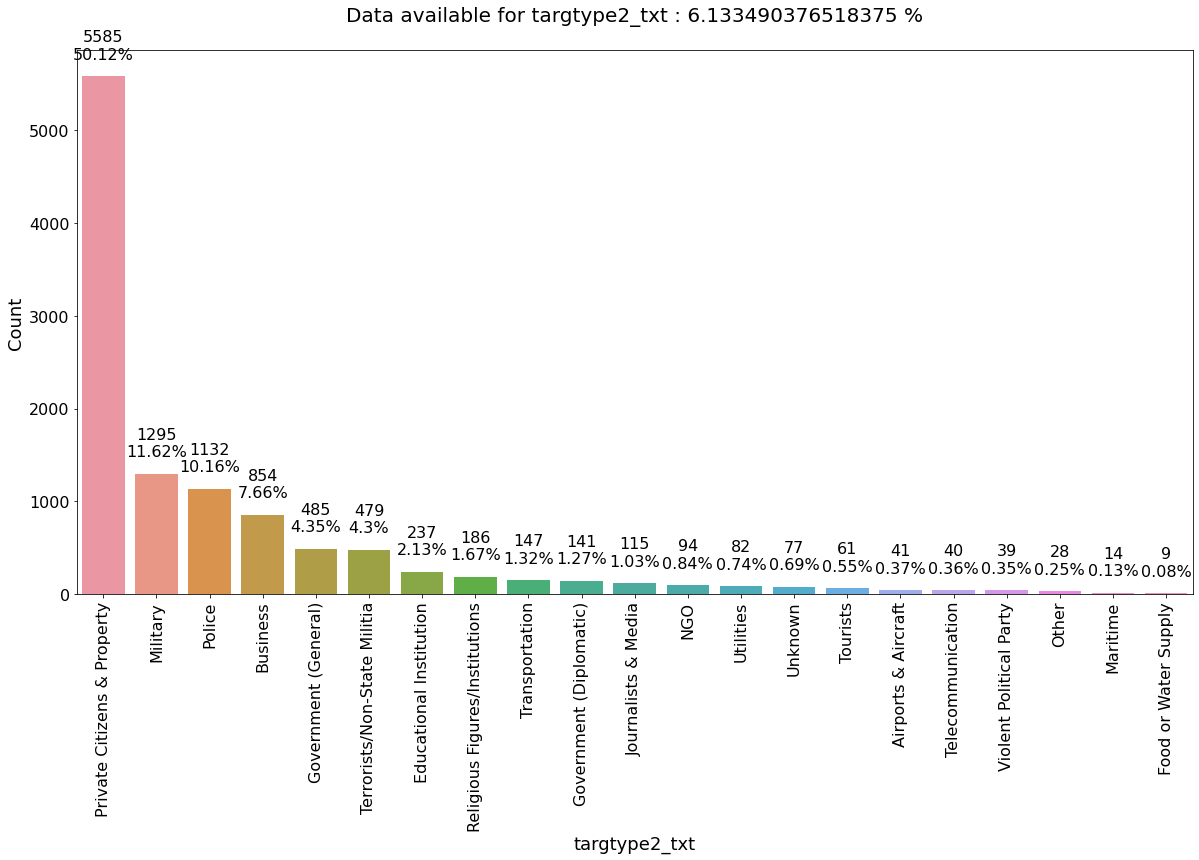

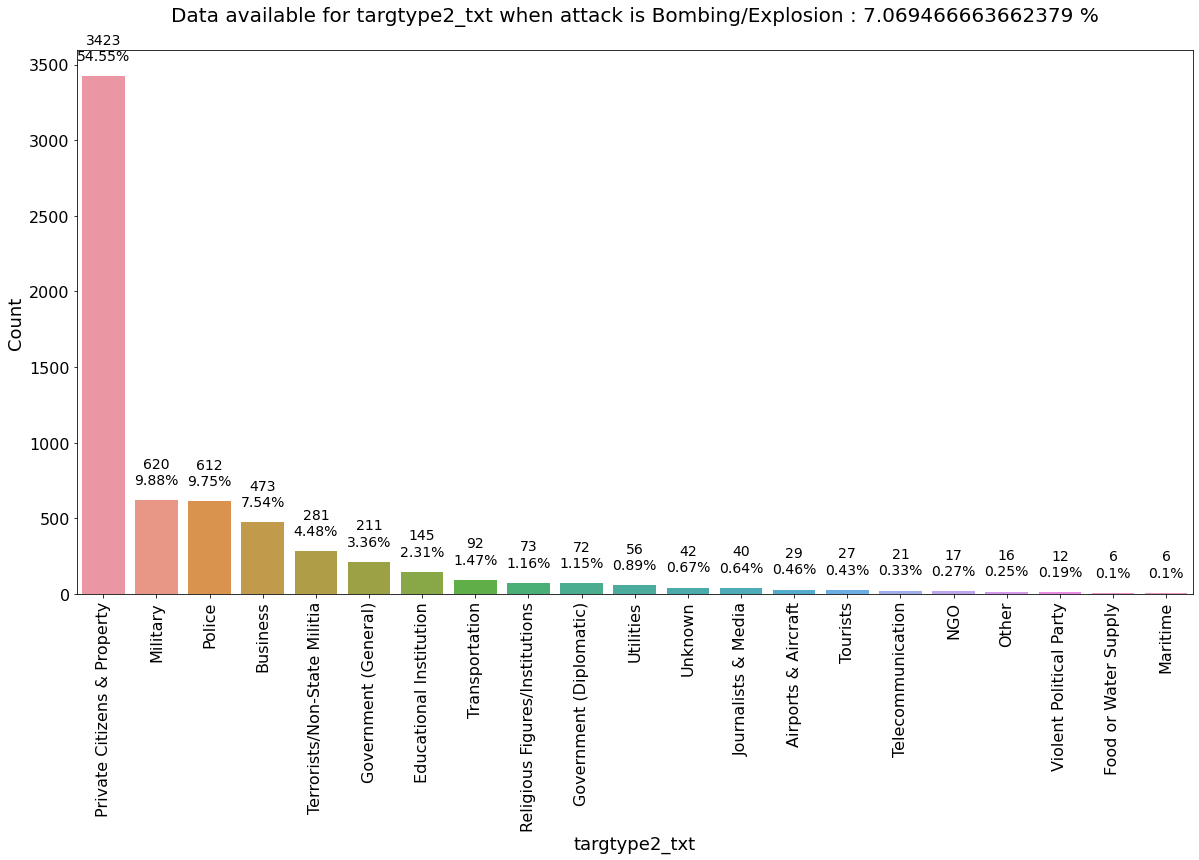

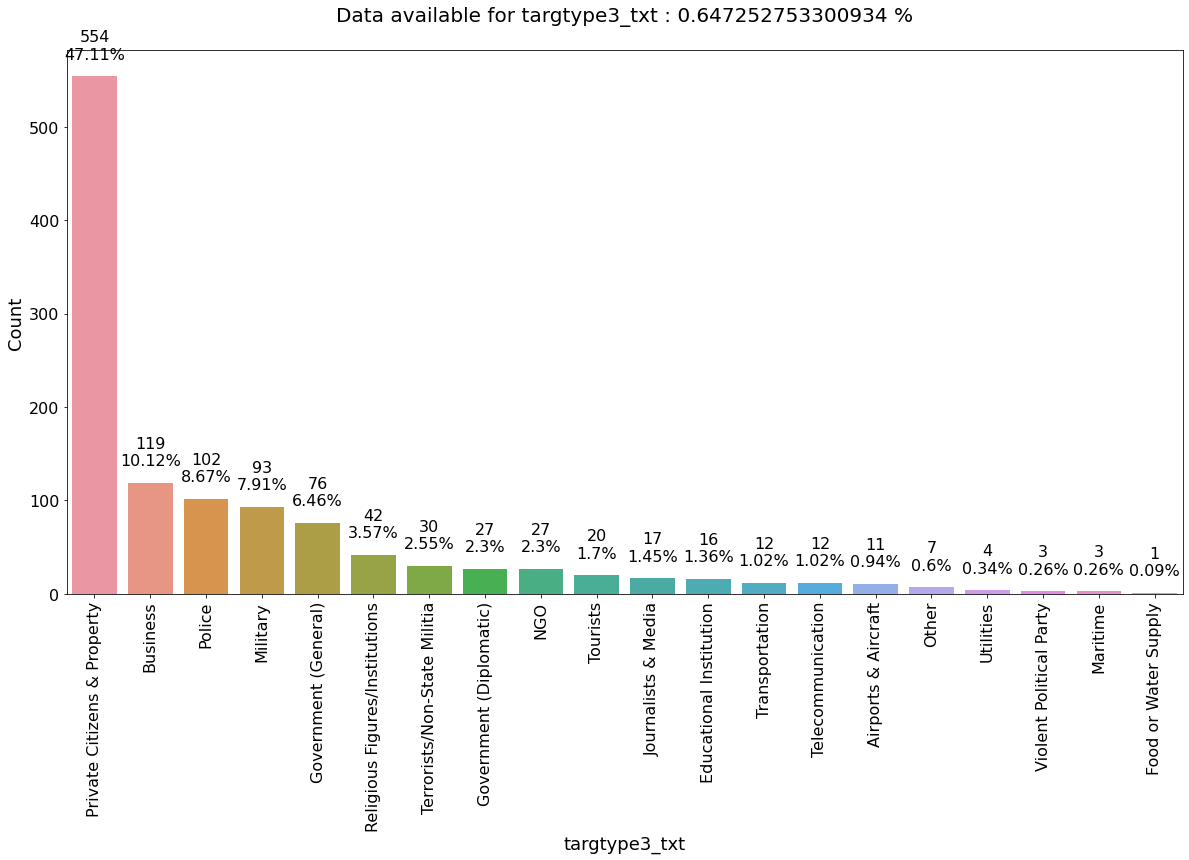

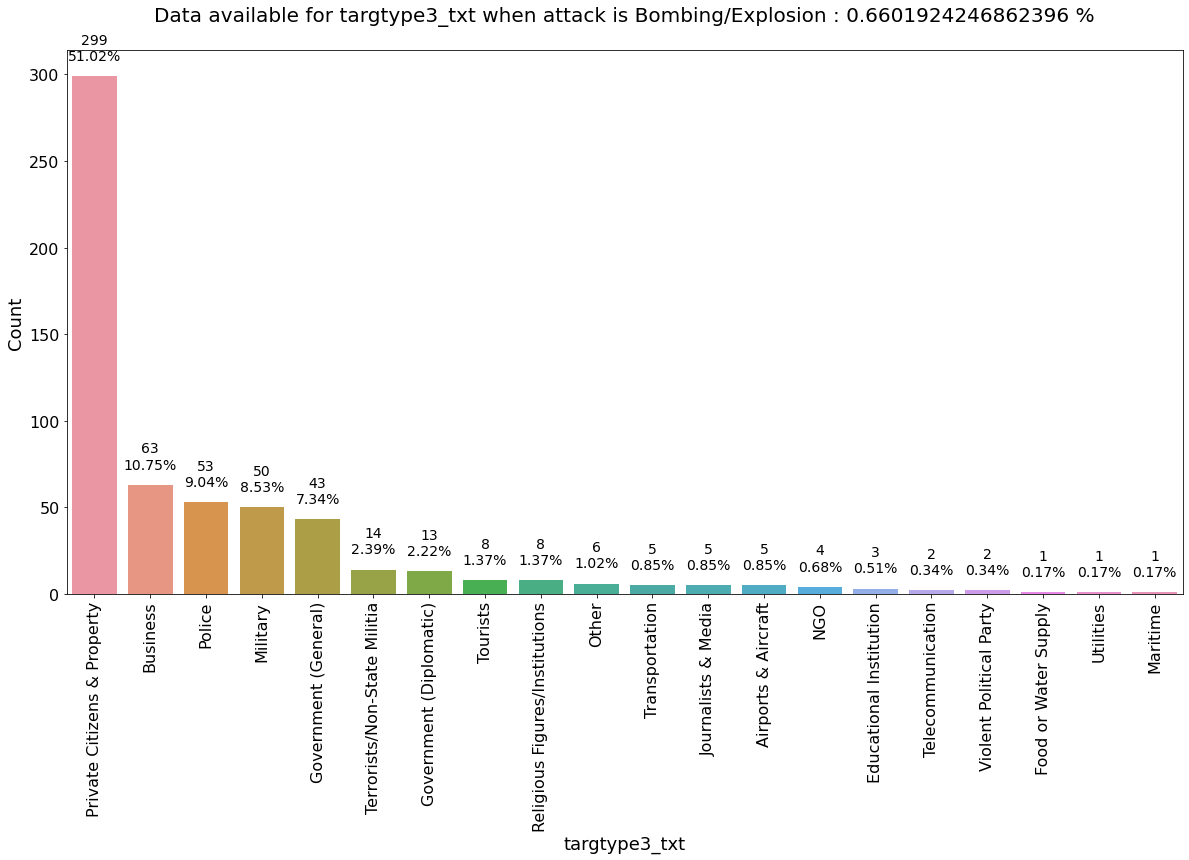

In [19]:
col = ['targtype1_txt', 'targtype2_txt', 'targtype3_txt']
c=0
y = df[(df['attacktype1_txt'] == 'Bombing/Explosion') | (df['attacktype2_txt'] == 'Bombing/Explosion') | (df['attacktype3_txt'] == 'Bombing/Explosion')]

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()
    
    txt = f'Data available for {i} when attack is Bombing/Explosion : {(y[i].count()/len(y))*100} %\n'
    x = y[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(y[y[i].isin(x)][i], order=y[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/y[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=14, ha='center')
    plt.show()

### Private Citizens & Property is main target type whereas Military & Police are the secondary target type.

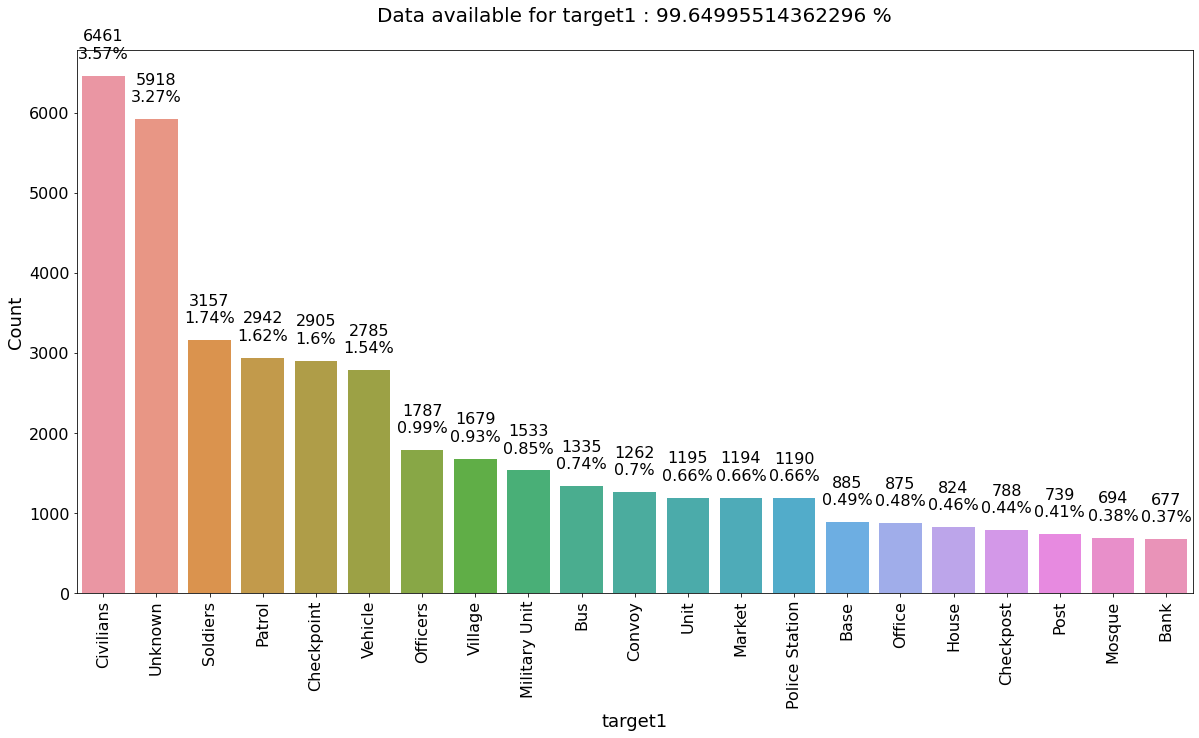

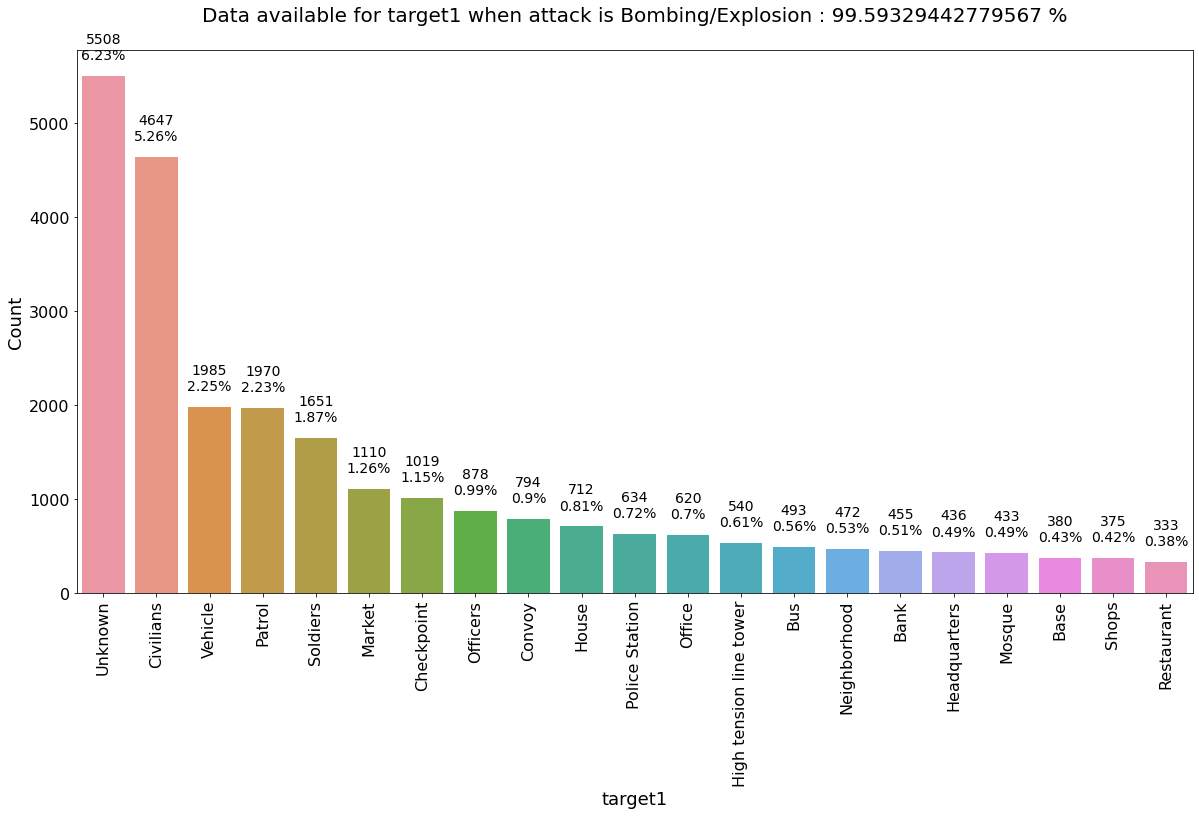

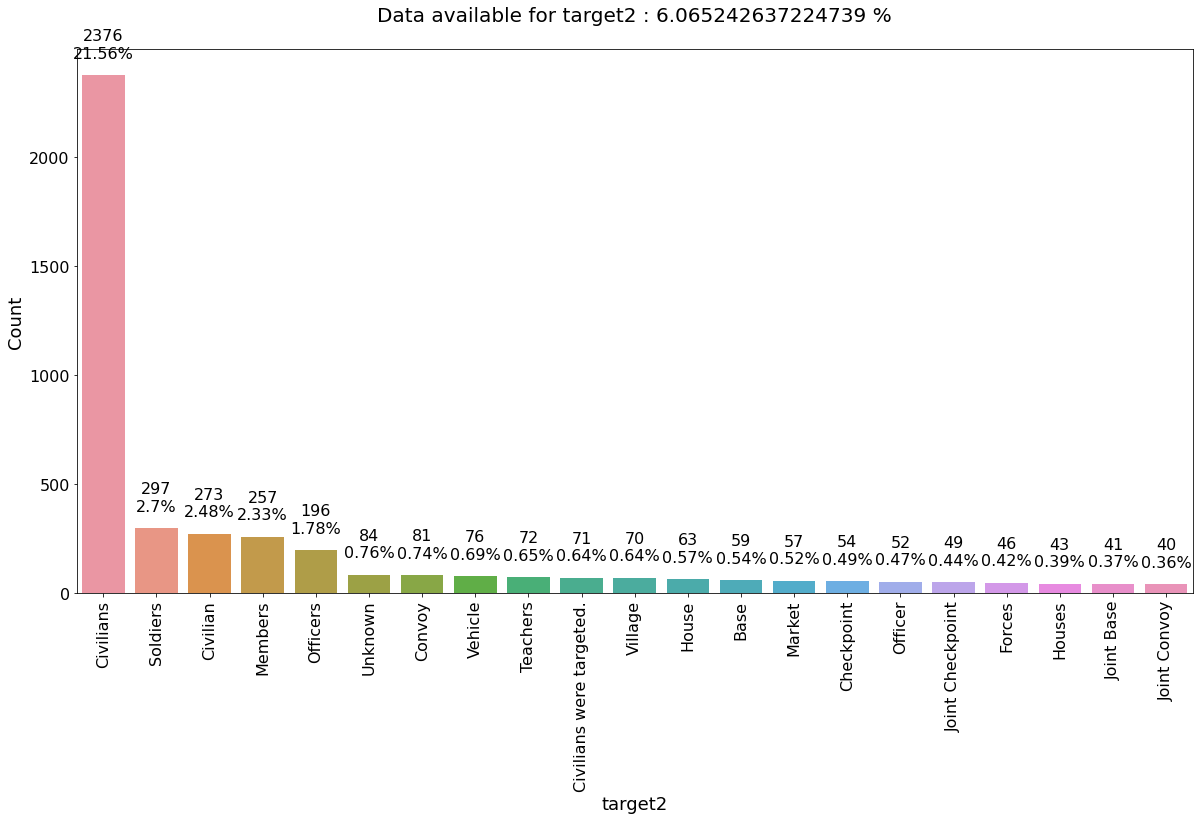

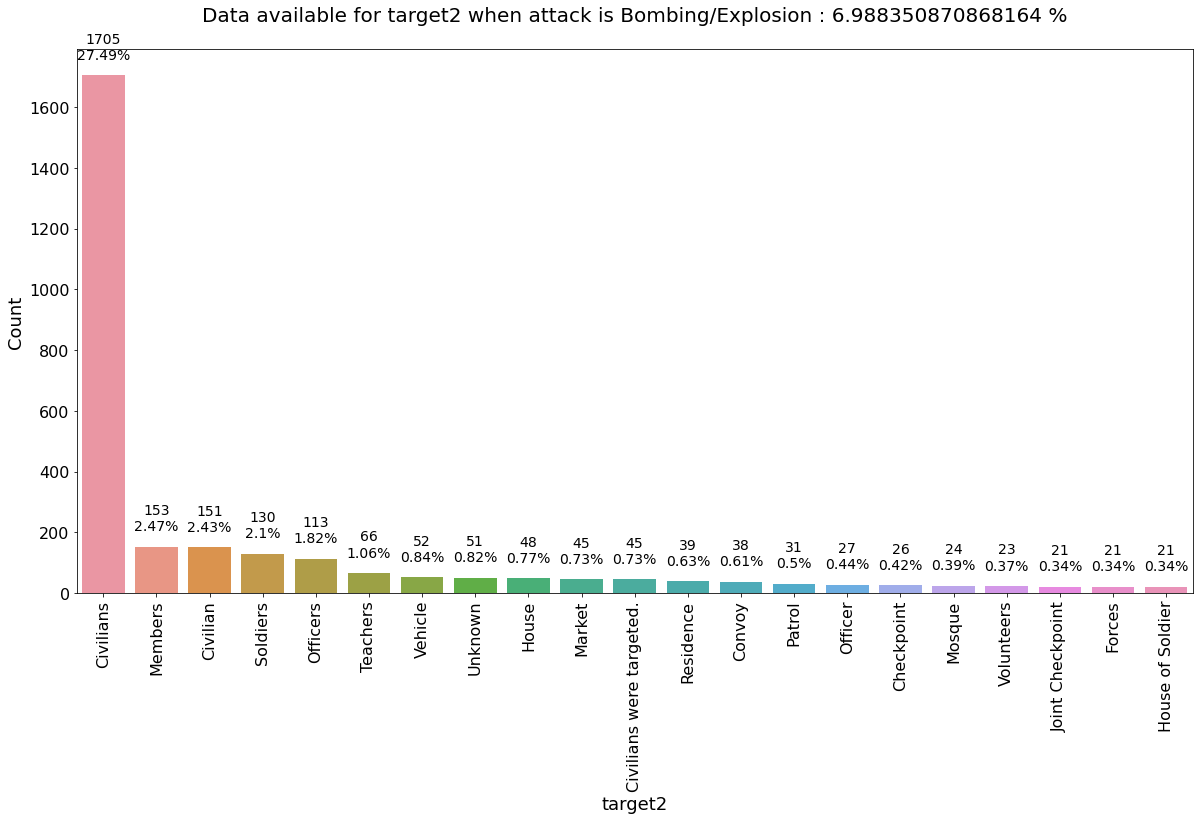

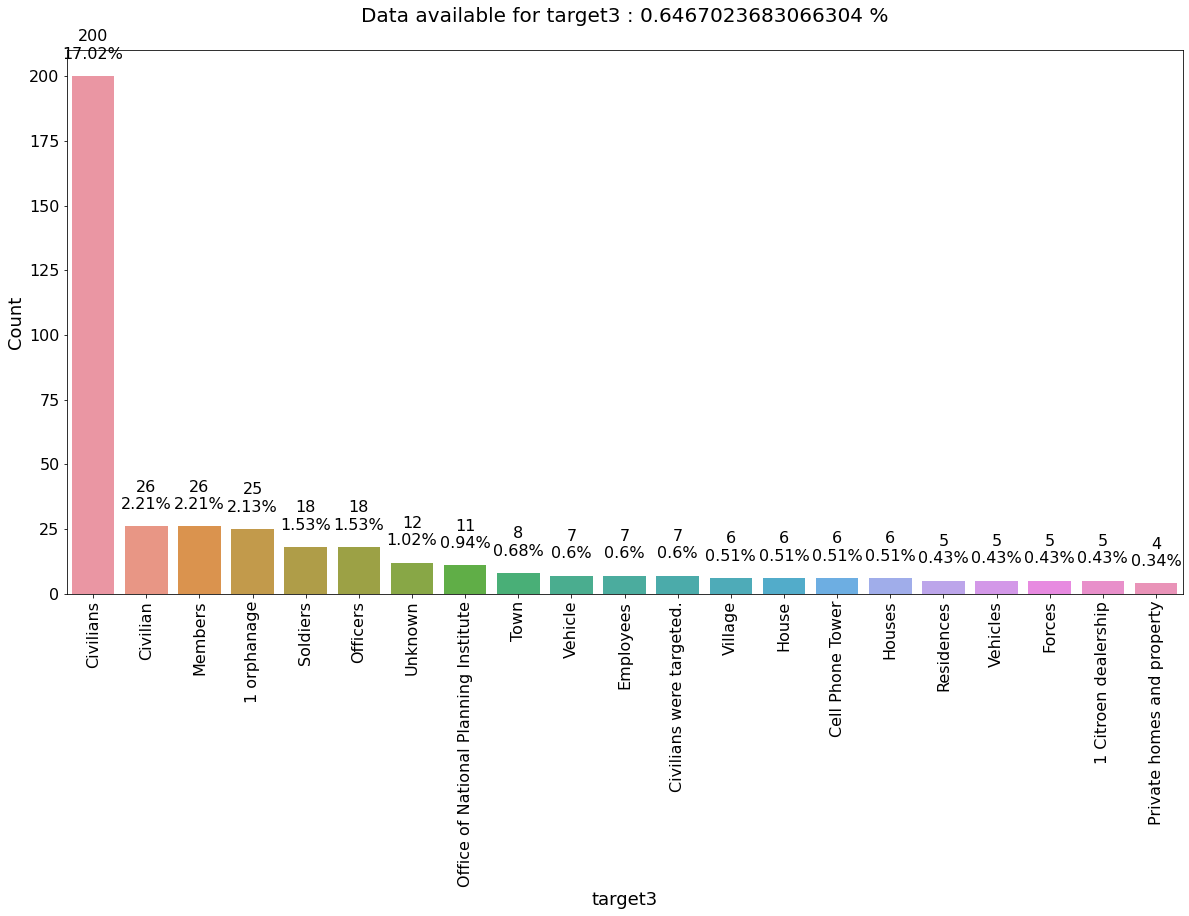

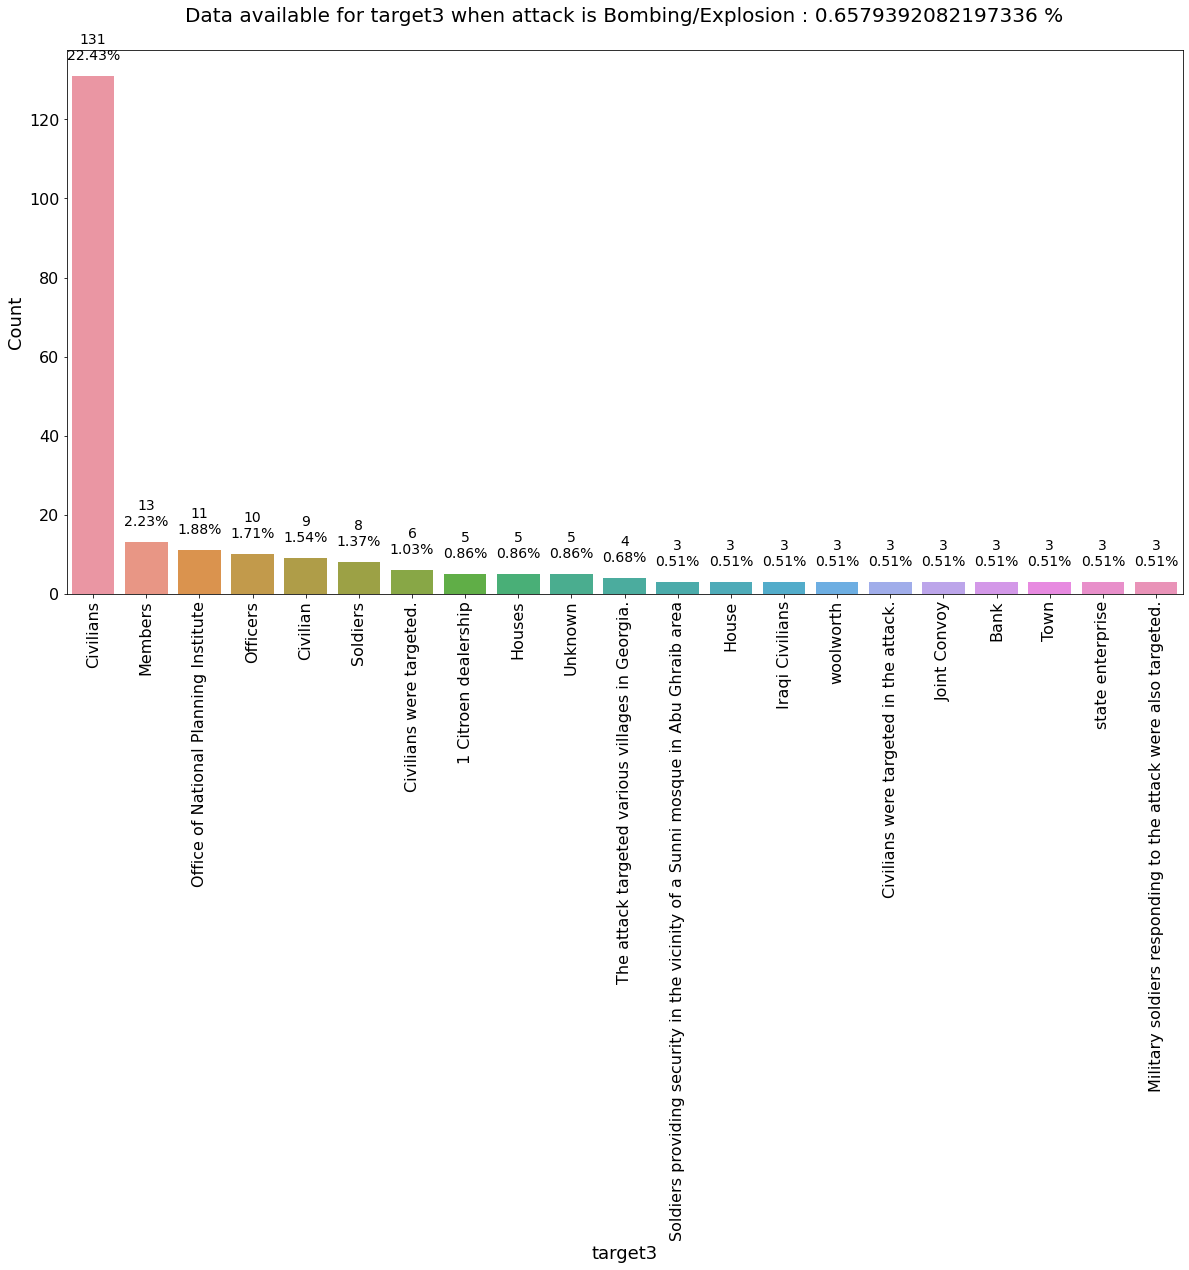

In [20]:
col = ['target1', 'target2', 'target3']
c=0
y = df[(df['attacktype1_txt'] == 'Bombing/Explosion') | (df['attacktype2_txt'] == 'Bombing/Explosion') | (df['attacktype3_txt'] == 'Bombing/Explosion')]

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()
    
    txt = f'Data available for {i} when attack is Bombing/Explosion : {(y[i].count()/len(y))*100} %\n'
    x = y[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(y[y[i].isin(x)][i], order=y[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/y[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=14, ha='center')
    plt.show()

### Civillians are the major target of the attack

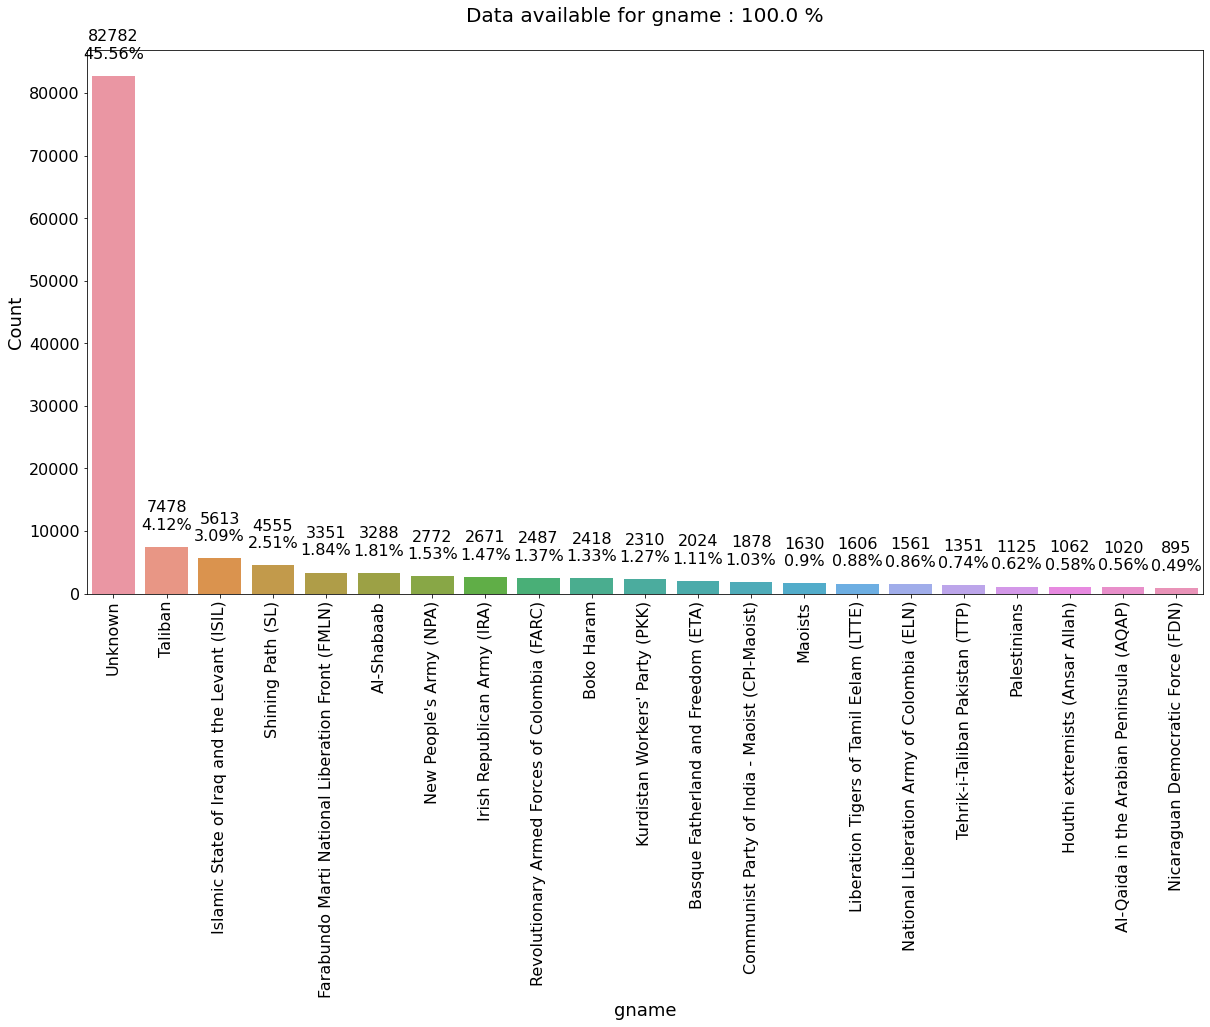

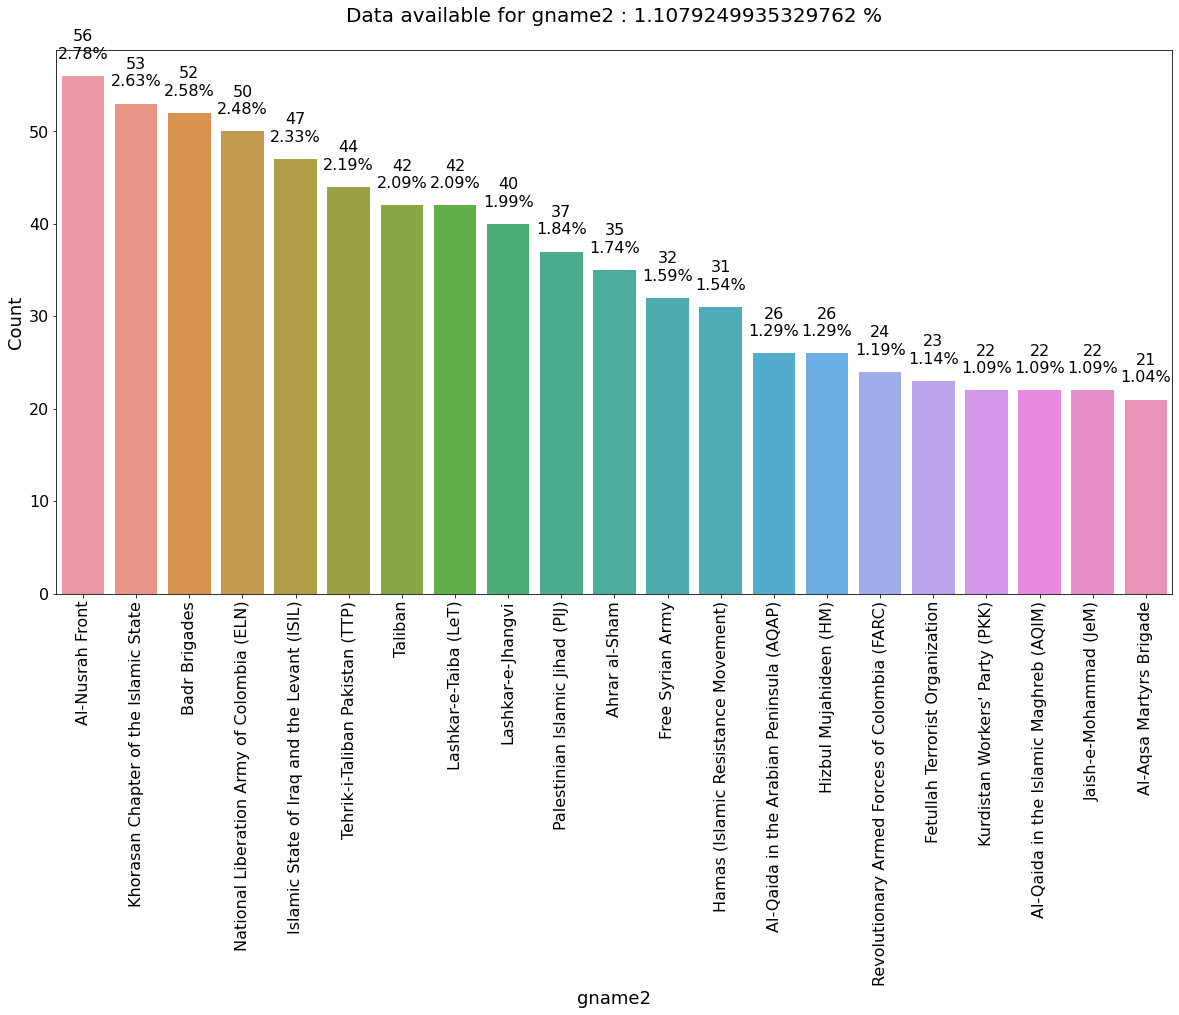

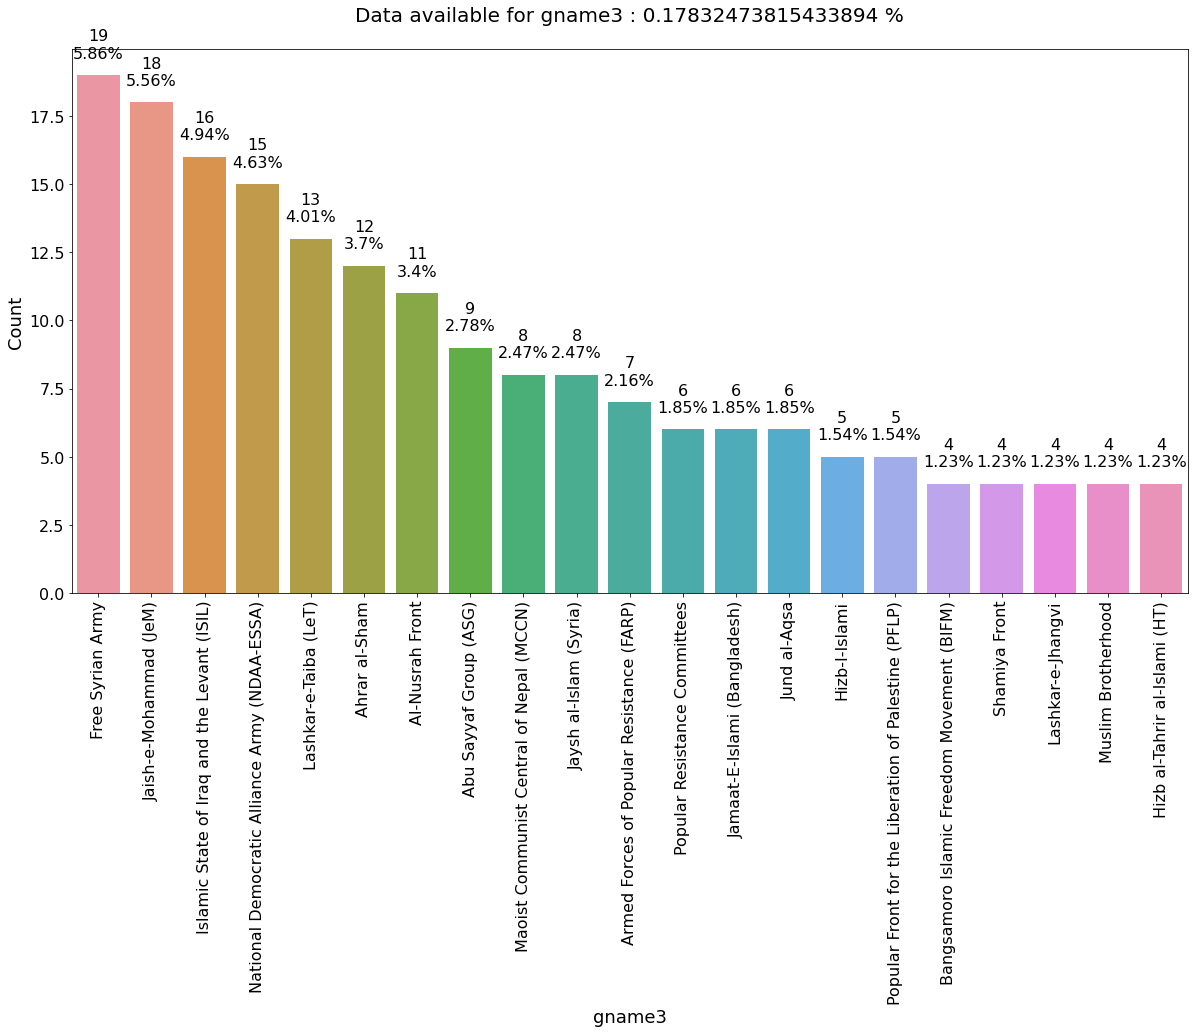

In [21]:
col = ['gname', 'gname2', 'gname3']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

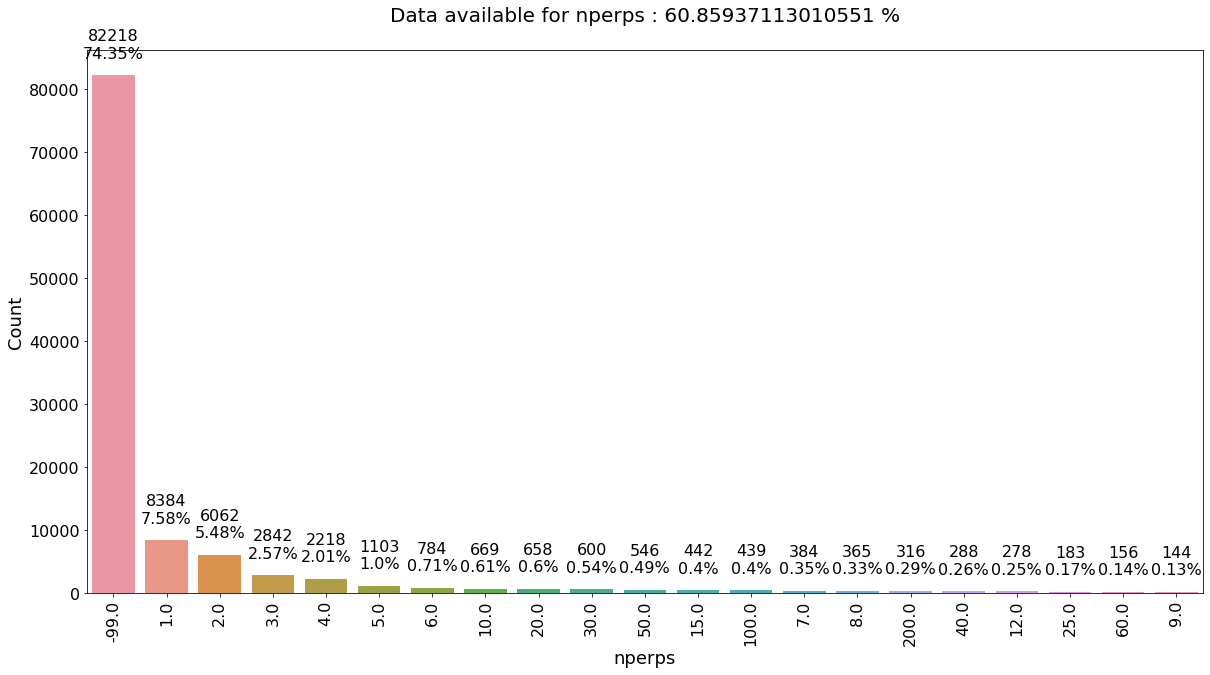

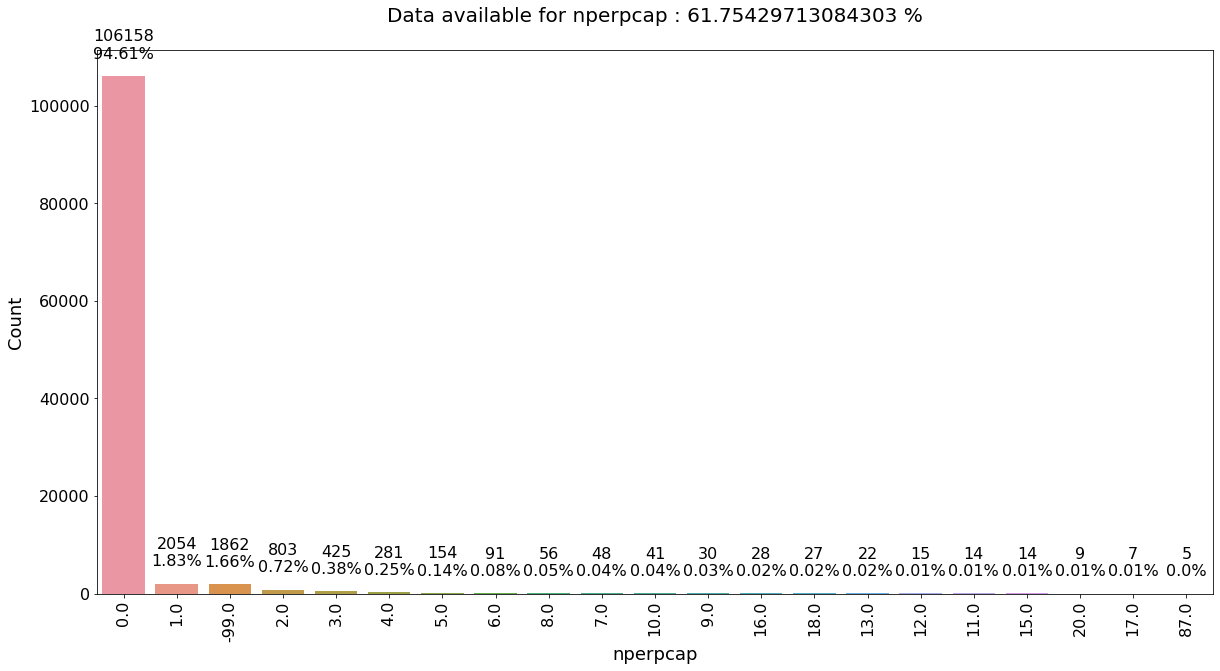

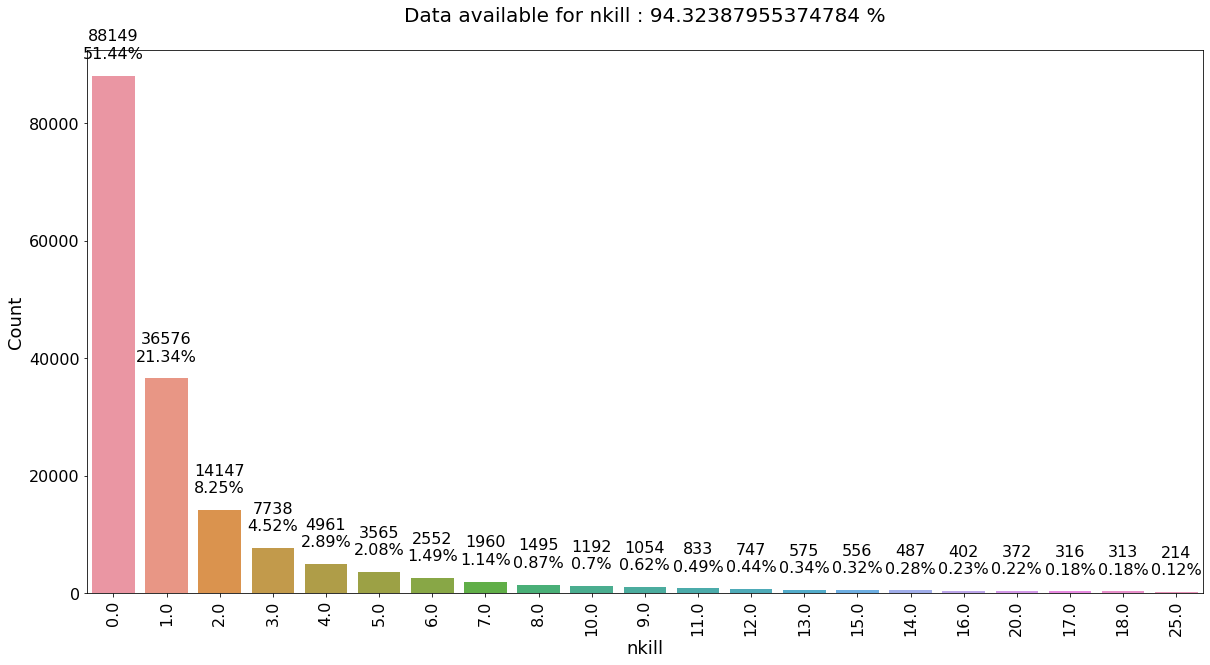

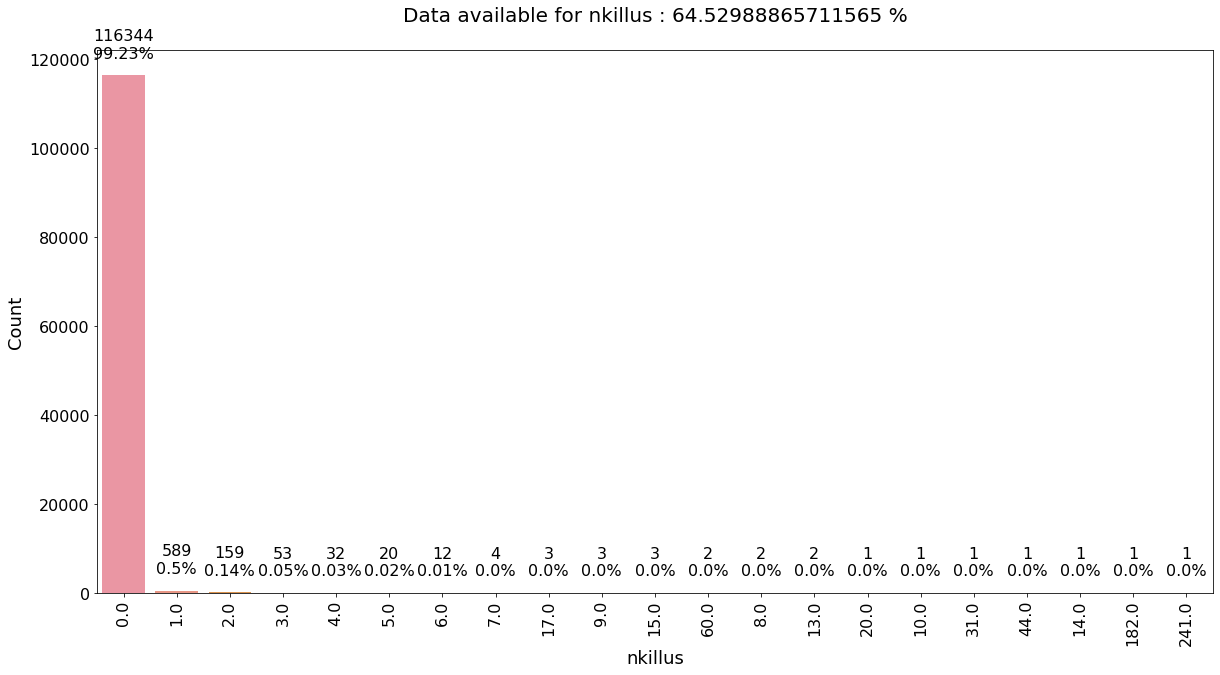

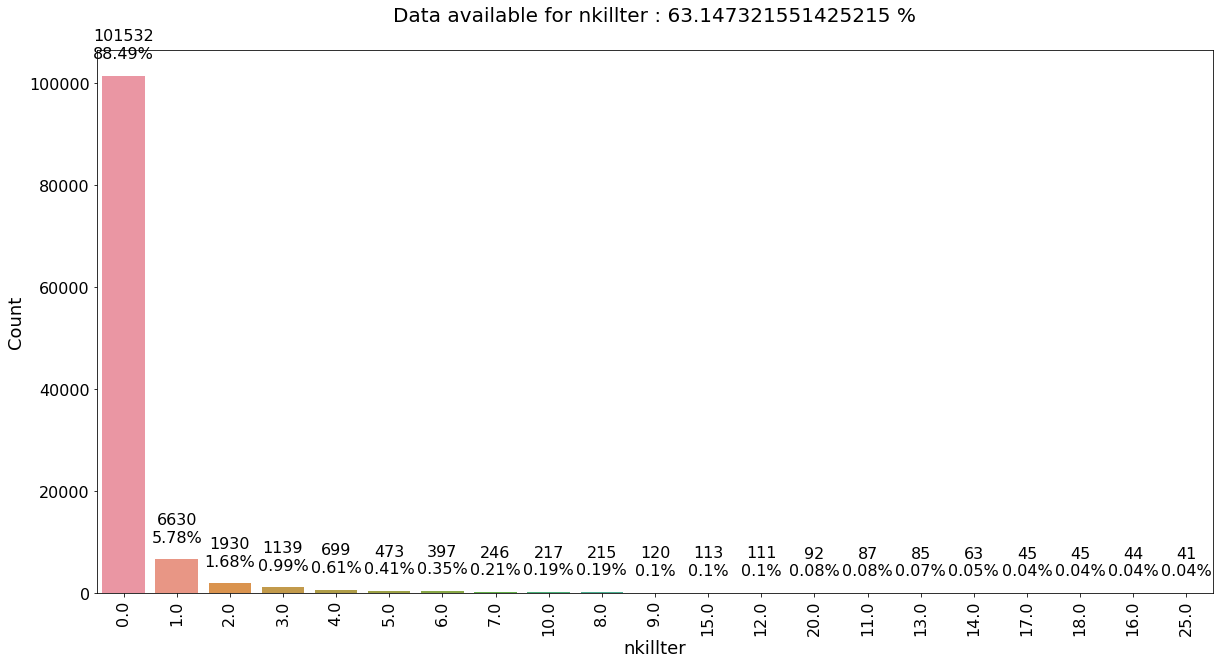

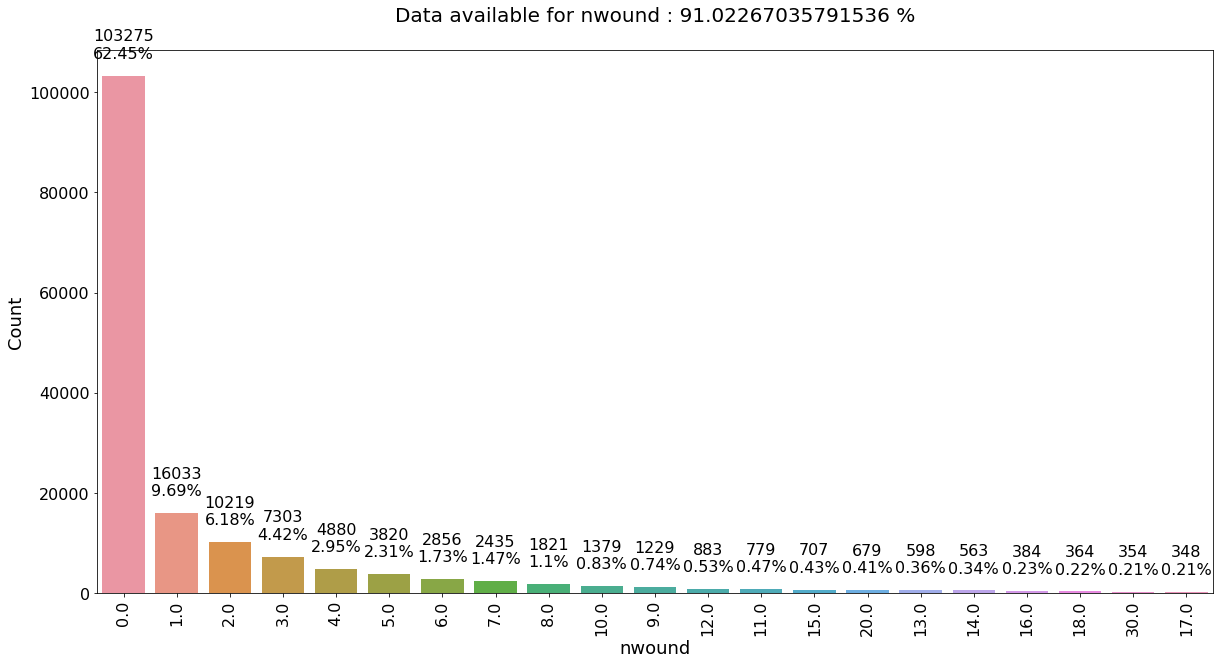

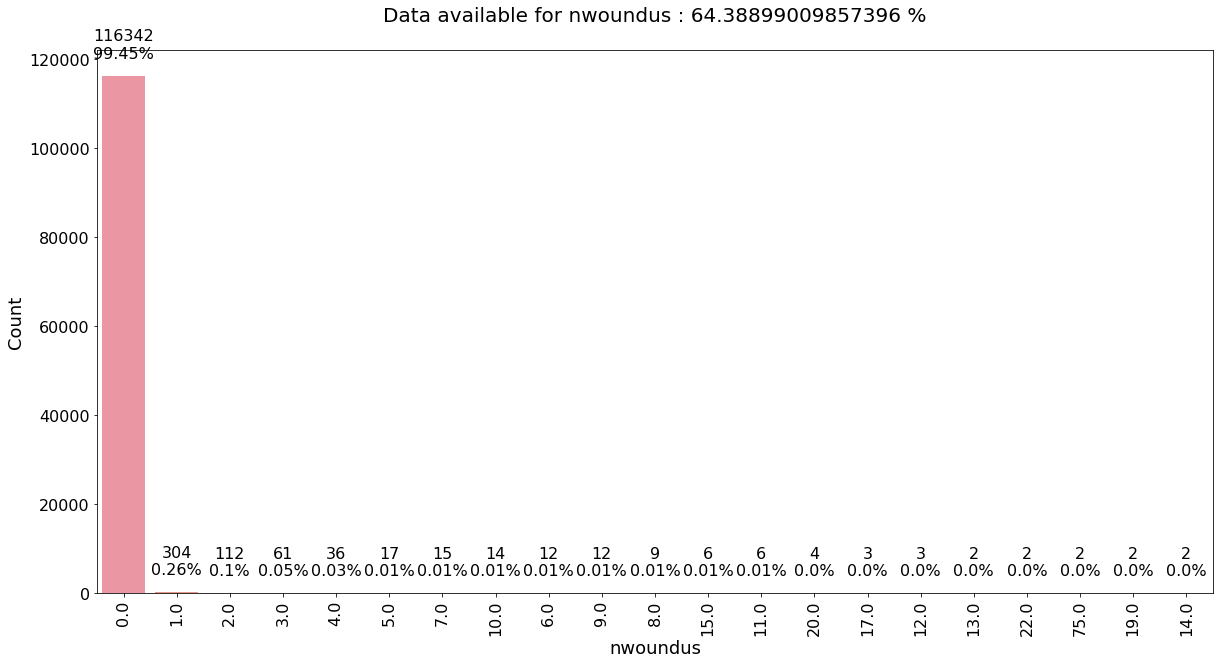

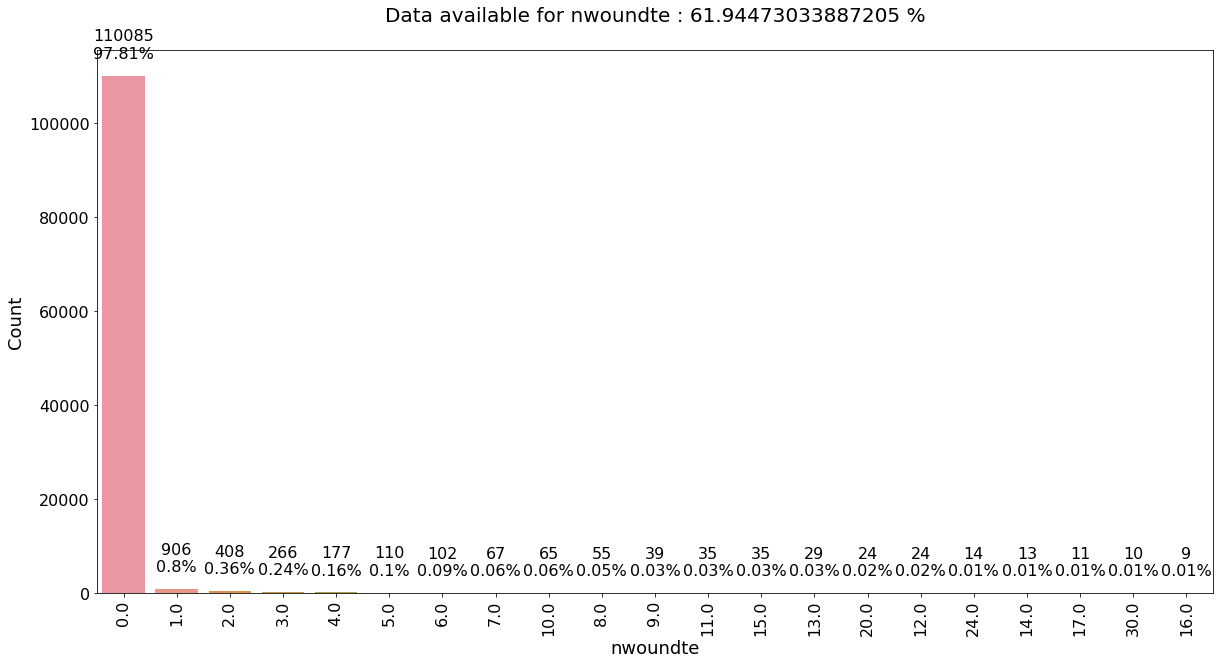

In [22]:
col = ['nperps', 'nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

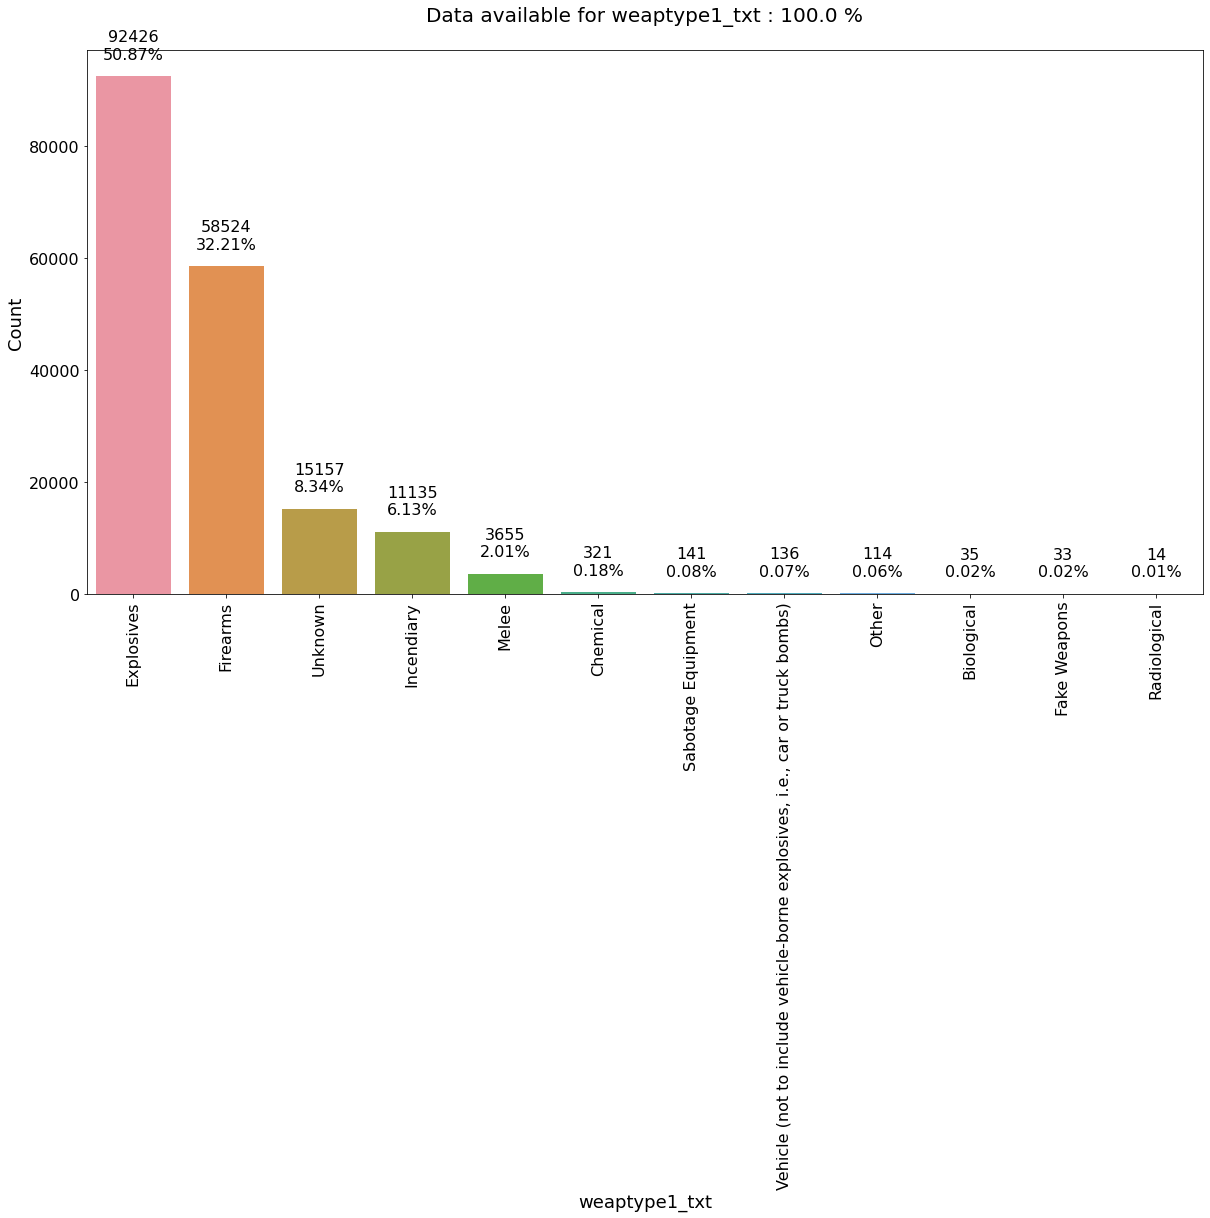

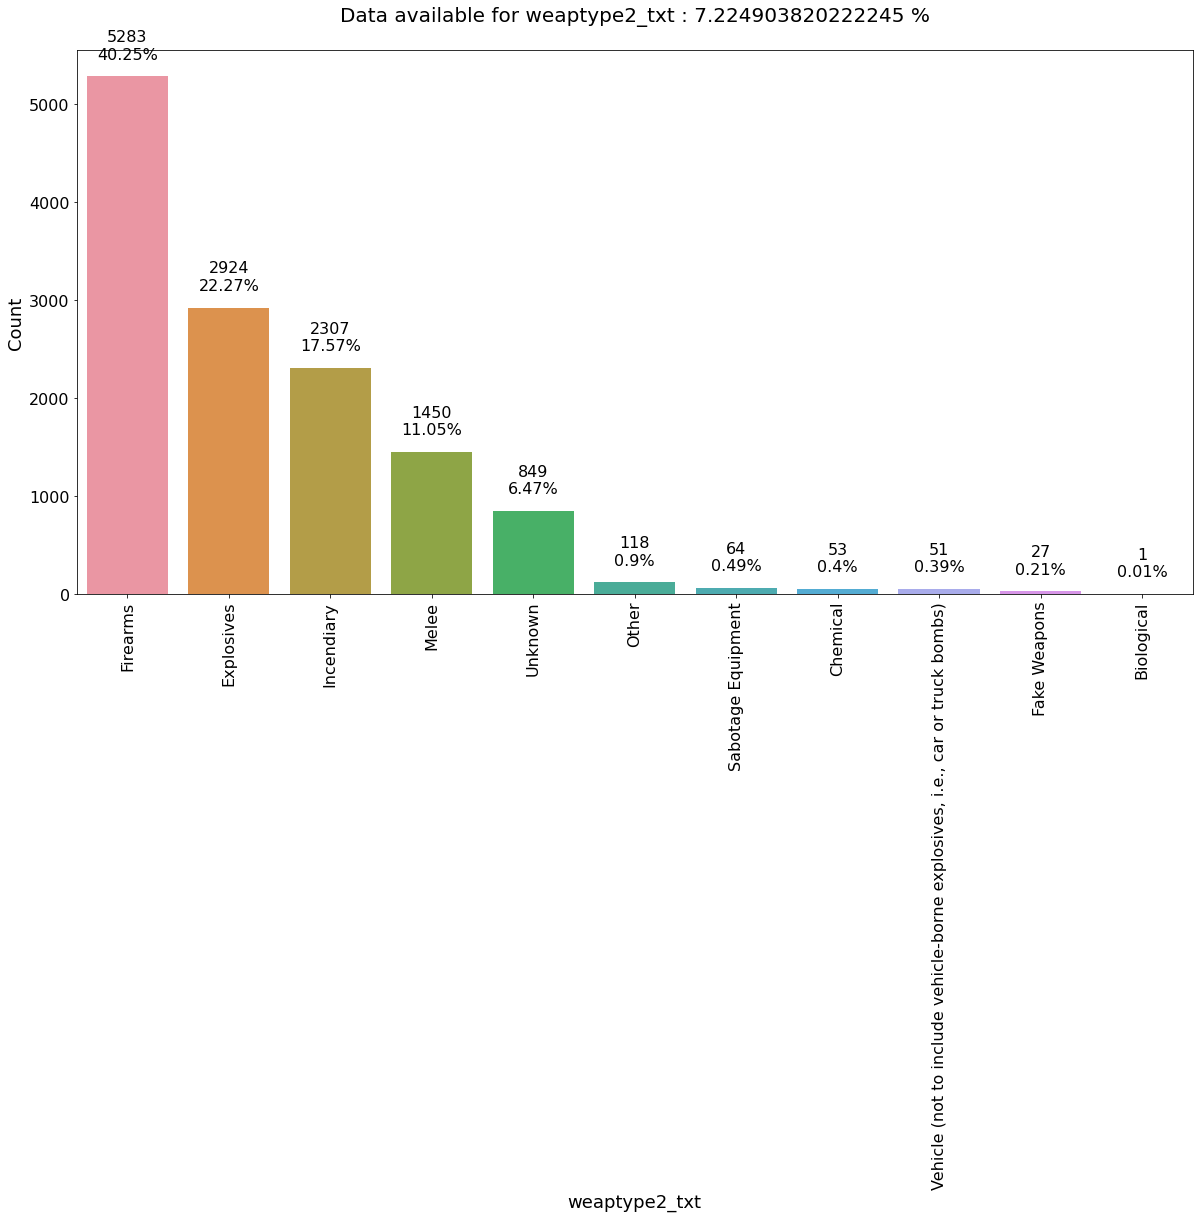

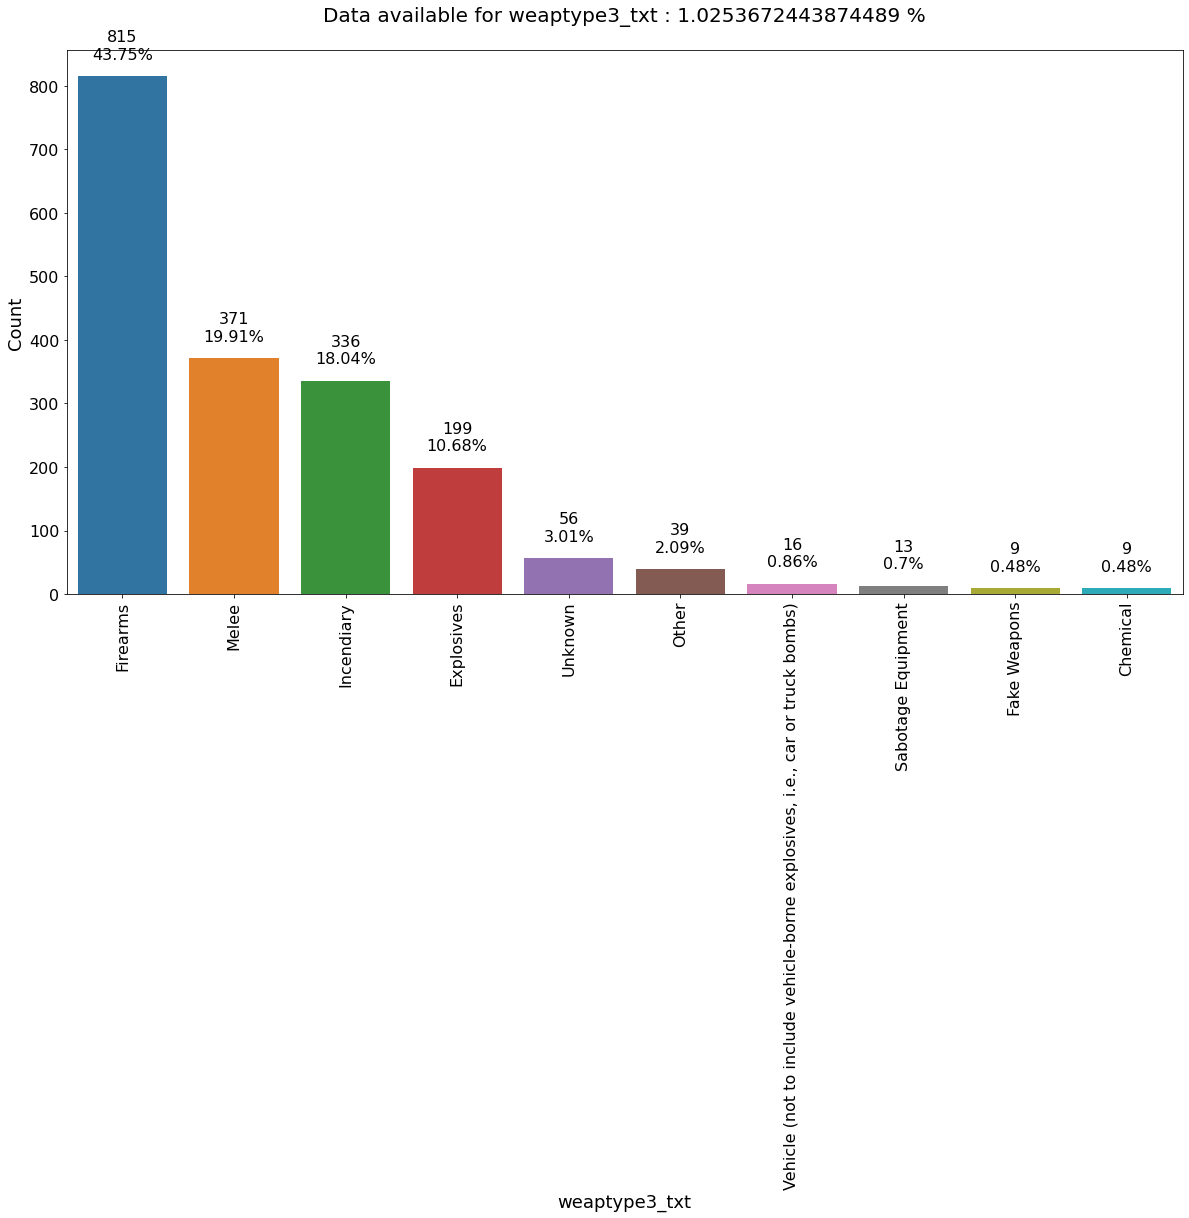

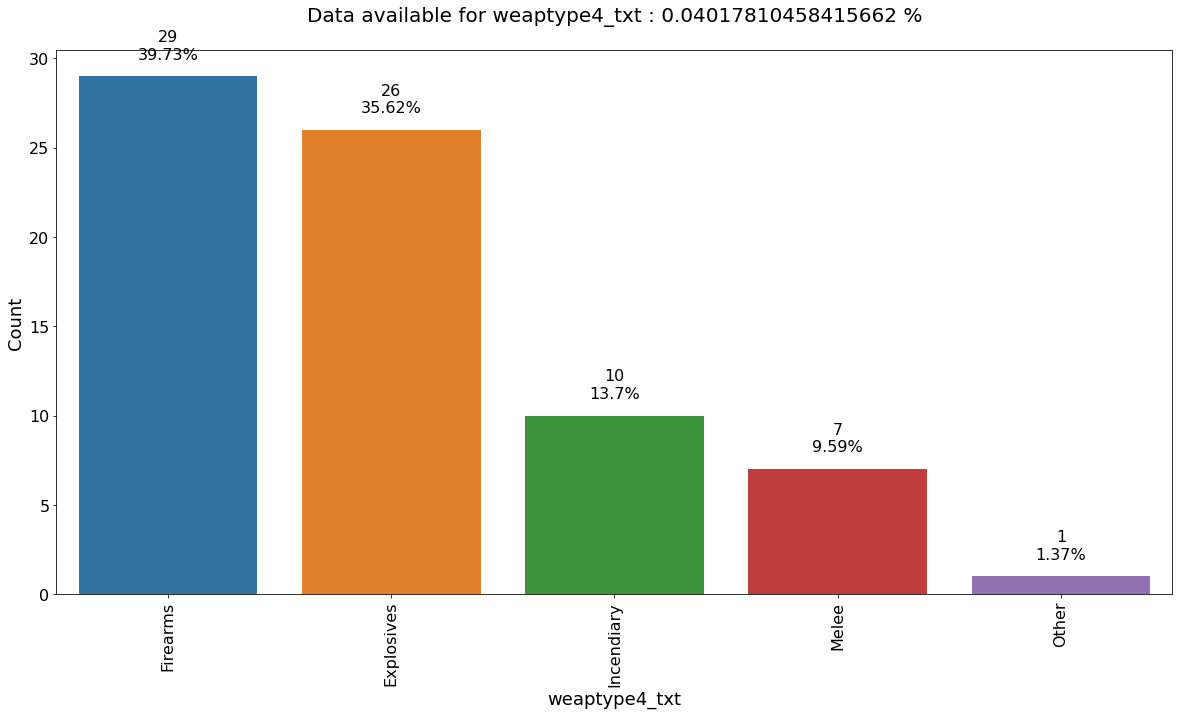

In [23]:
col = ['weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt', 'weaptype4_txt']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

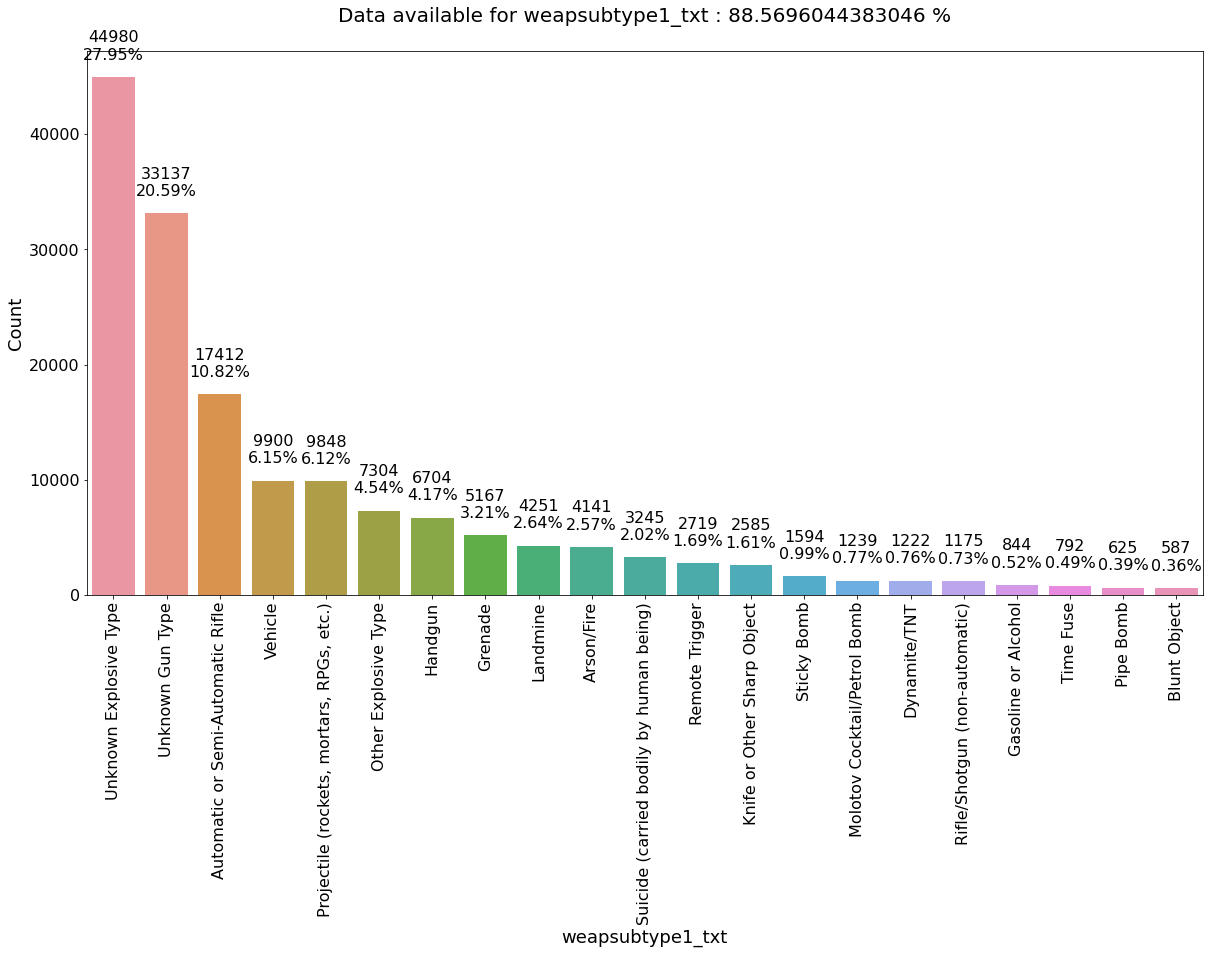

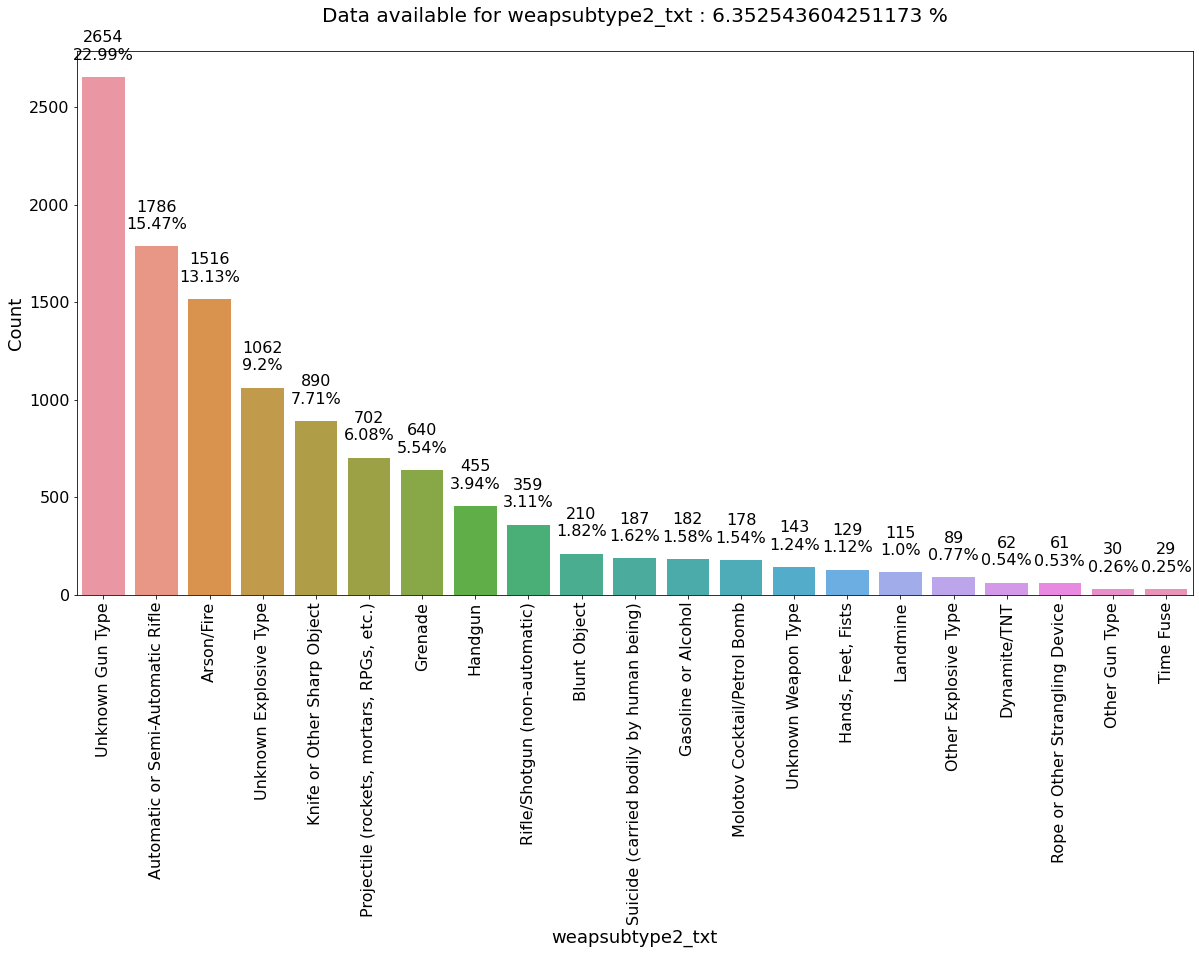

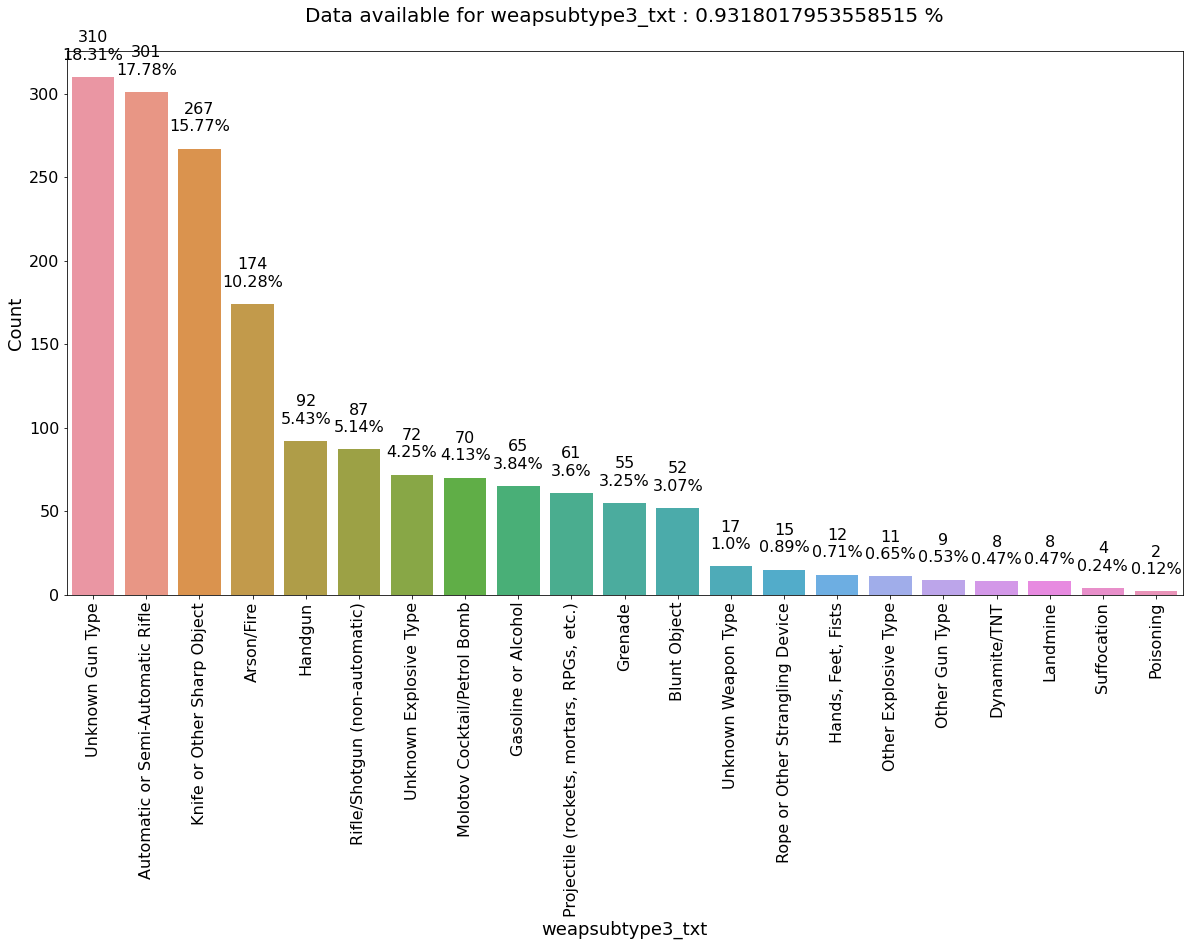

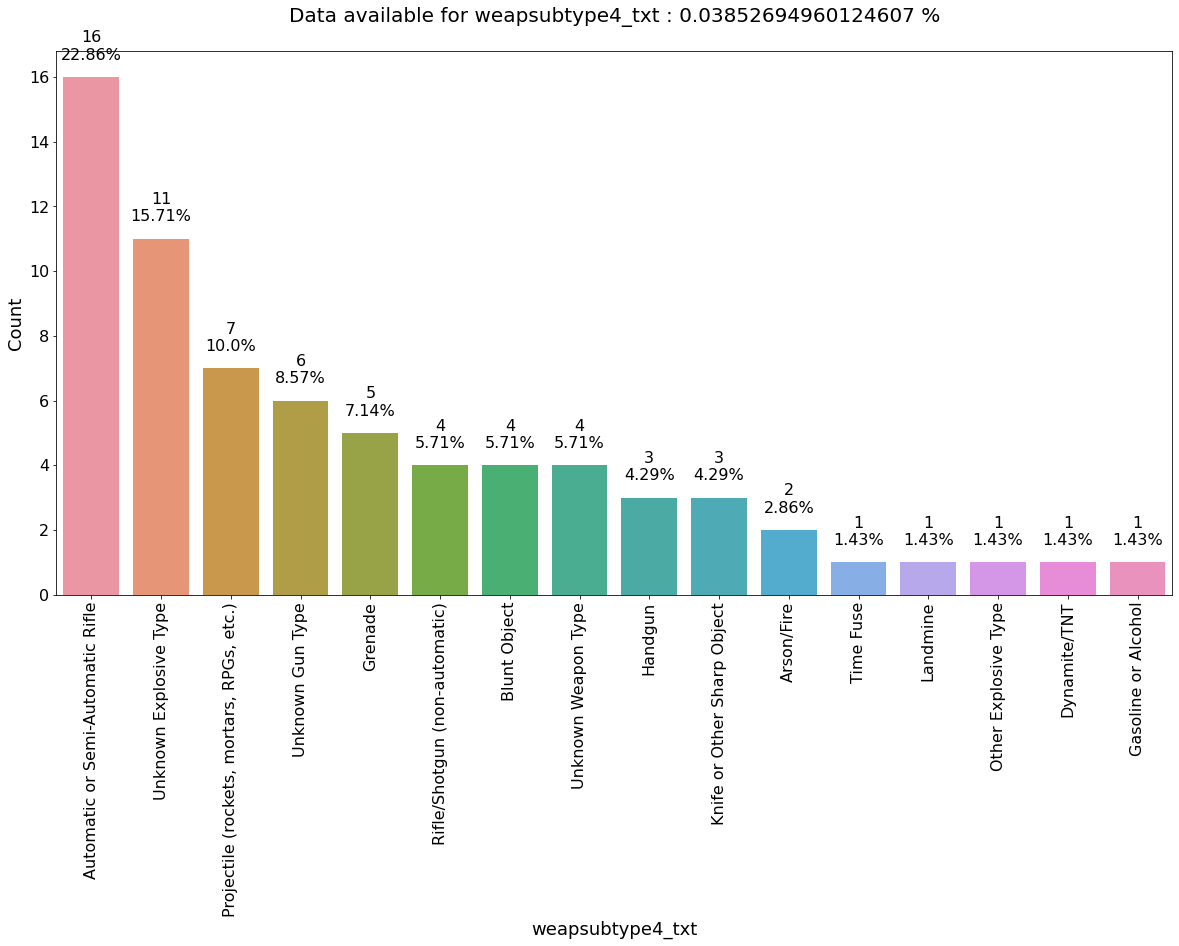

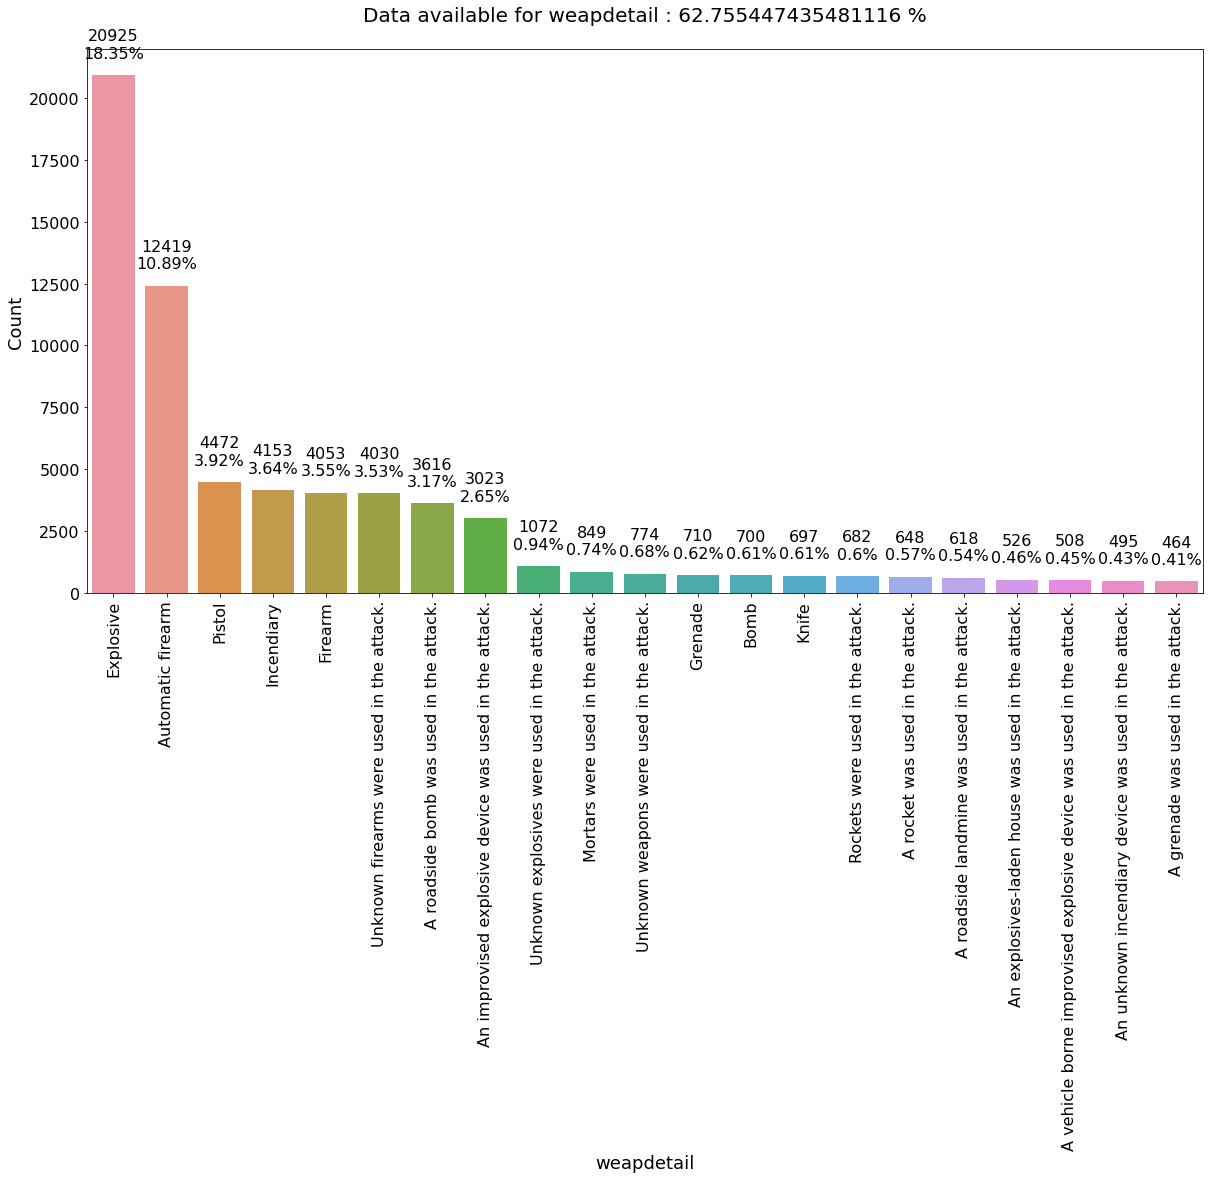

In [24]:
col = ['weapsubtype1_txt','weapsubtype2_txt', 'weapsubtype3_txt', 'weapsubtype4_txt', 'weapdetail']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

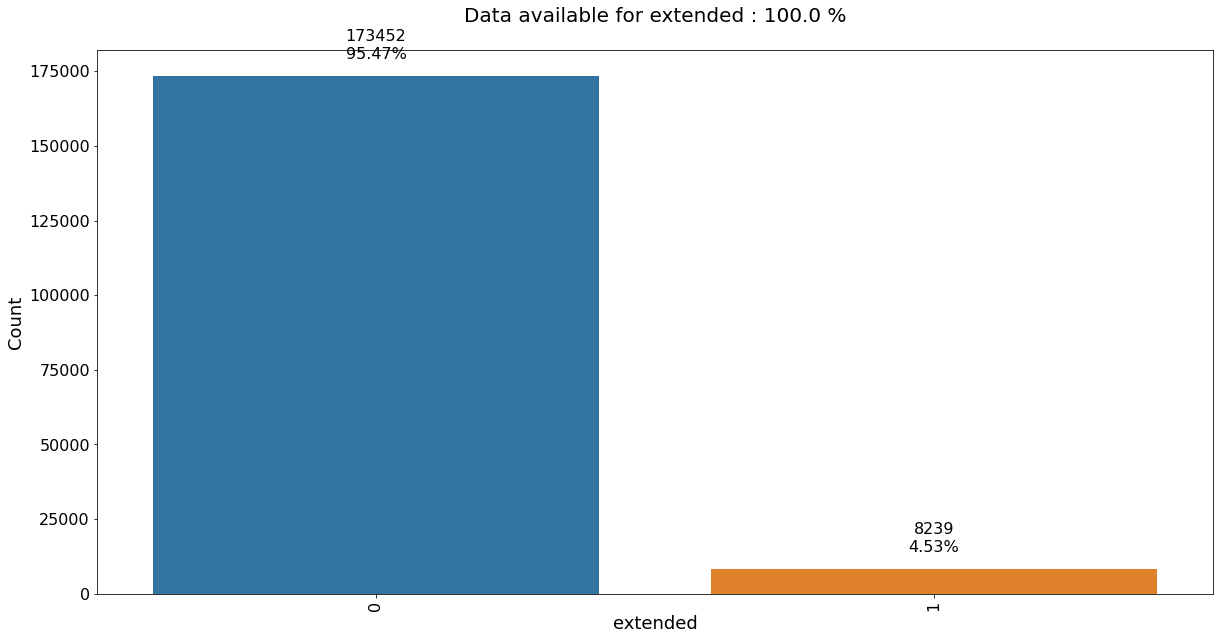

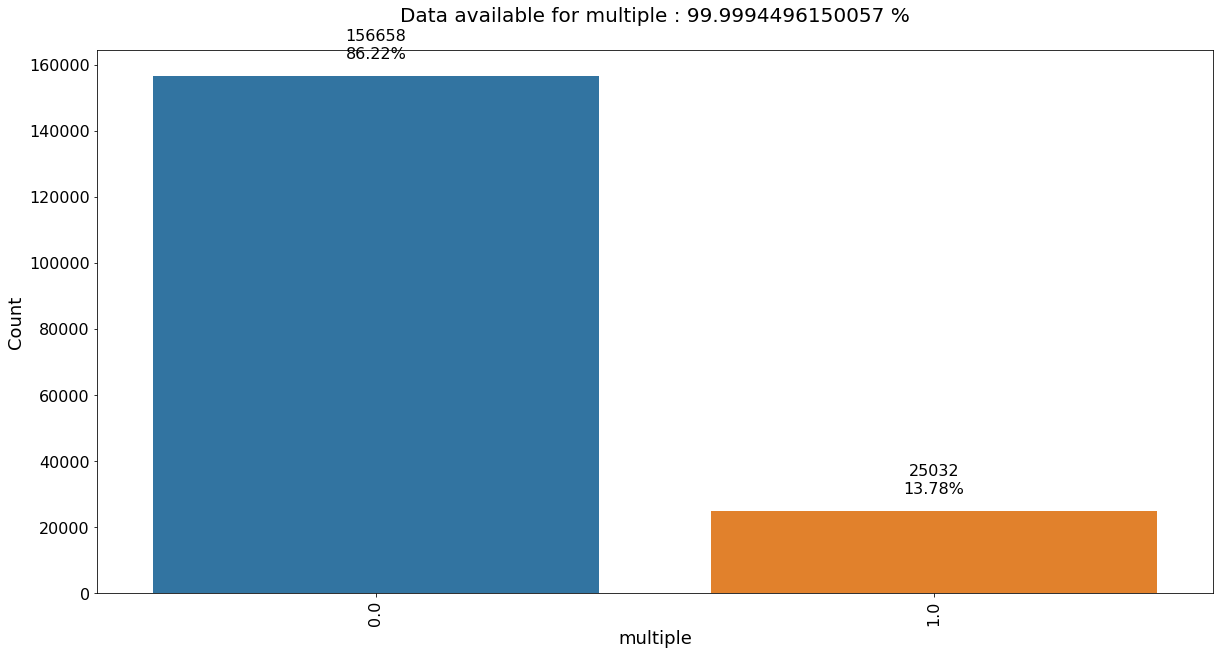

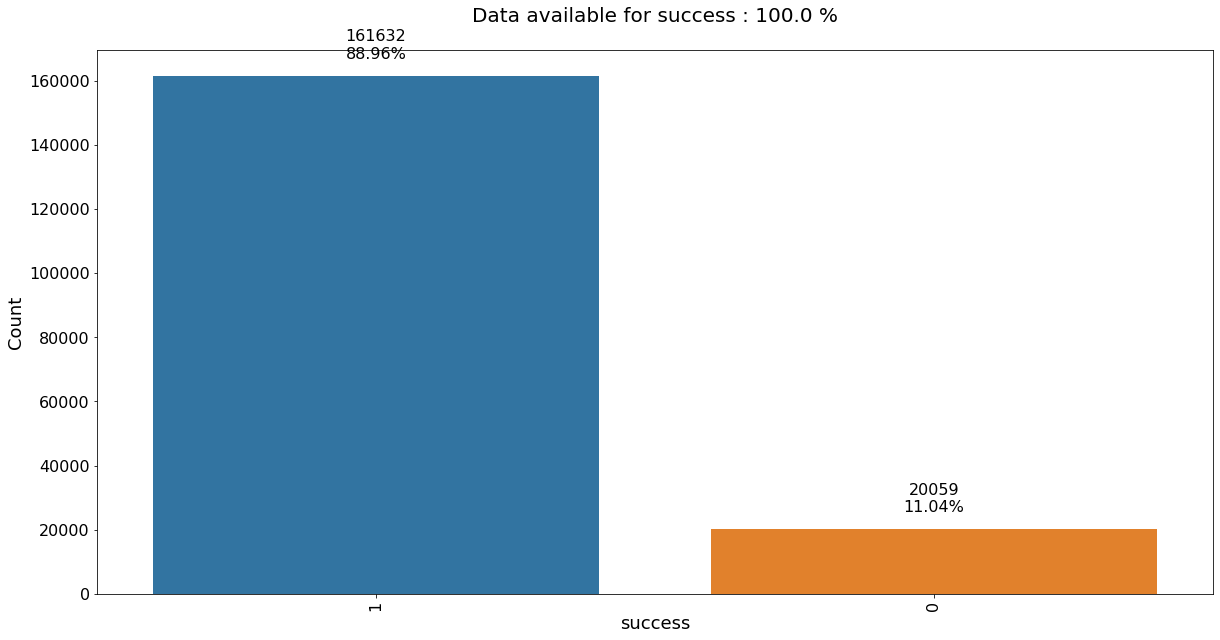

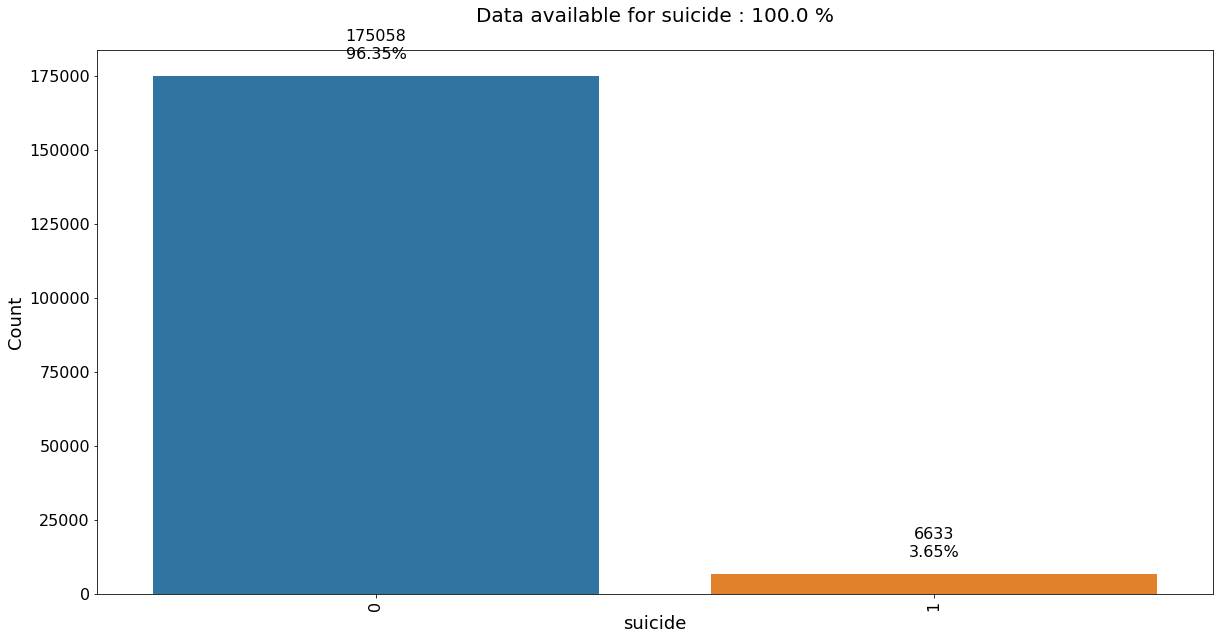

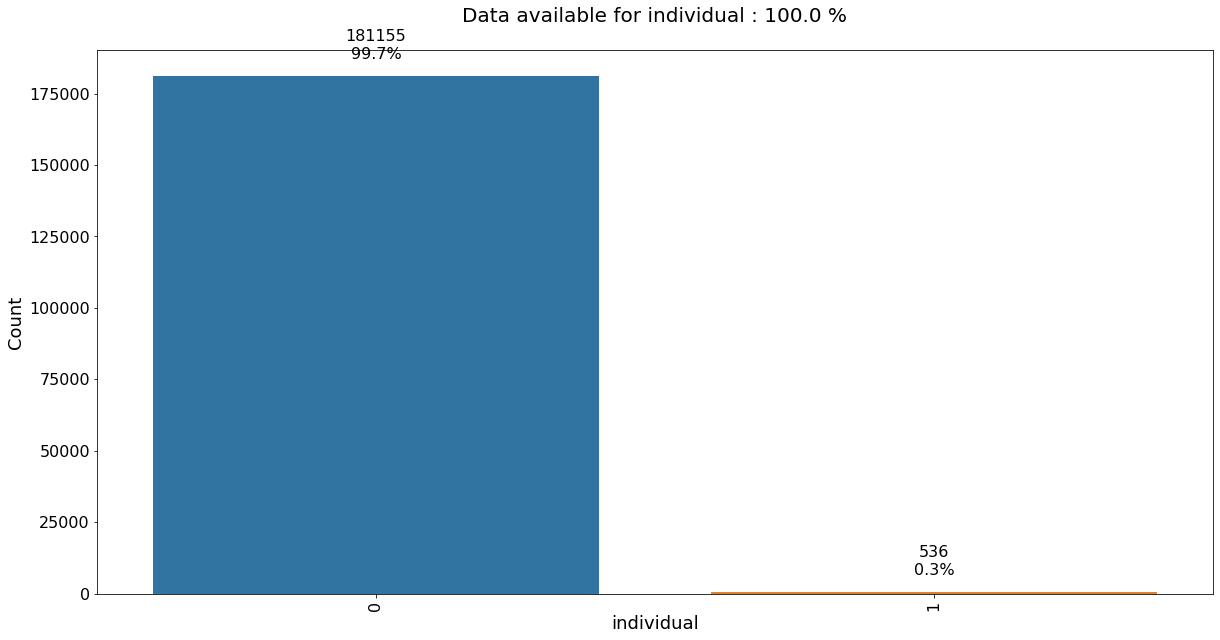

In [25]:
col = ['extended', 'multiple', 'success', 'suicide', 'individual']
c=0

for i in col:
    txt = f'Data available for {i} : {(df[i].count()/len(df))*100} %\n'
    x = df[i].value_counts().index[:21]
    
    plt.figure(figsize=(20,10))
    plt.title(txt, fontsize=20)
    
    ax = sns.countplot(df[df[i].isin(x)][i], order=df[i].value_counts().index[:21])
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Count',fontsize=18)
    c+= 1
    
    for p in ax.patches:
        txt = str(p.get_height()) +'\n' + str(round((p.get_height()/df[i].count())*100, 2))+ '%\n'
        ax.text(p.get_x()+p.get_width()/2, p.get_height(), txt, fontsize=16, ha='center')
    plt.show()

# Addition part if you want to use dataset after filling missing values

### In this dataset there's a lot of missing values, so using threashold as 50% for missing values

In [26]:
df1 = df.copy()

for i in df.columns:
    if (df[i].isna().sum()/len(df1)) > 0.5:
        df = df.drop(i, axis=1)
        
df = df.drop('eventid', axis=1)
df.shape

(181691, 49)

#### 78 columns are deleted from dataset

### If missing values in column are less than 15% of total value then replacing it with mode value. 

In [27]:
for i in df.columns:
    if (df[i].isna().sum()/len(df1)) < 0.15:
        df[i] = df[i].fillna(df[i].mode().values[0])

details(df)

Counts Missing  Missing percent  Unique    Dtype  \
iyear             181691  0       0.000000         47      int64     
imonth            181691  0       0.000000         13      int64     
iday              181691  0       0.000000         32      int64     
extended          181691  0       0.000000         2       int64     
country_txt       181691  0       0.000000         205     object    
region_txt        181691  0       0.000000         12      object    
provstate         181691  0       0.000000         2855    object    
city              181691  0       0.000000         36674   object    
latitude          181691  0       0.000000         48322   float64   
longitude         181691  0       0.000000         48039   float64   
specificity       181691  0       0.000000         5       float64   
vicinity          181691  0       0.000000         3       int64     
summary           115562  66129   36.396409        112492  object    
crit1             181691  0       0.000000         2       int64     
crit2             181691  0       0.000000         2       int64     
crit3             181691  0       0.000000         2       int64     
doubtterr         181691  0       0.000000         3       float64   
multiple          181691  0       0.000000         2       float64   
success           181691  0       0.000000         2       int64     
suicide           181691  0       0.000000         2       int64     
attacktype1_txt   181691  0       0.000000         9       object    
targtype1_txt     181691  0       0.000000         22      object    
targsubtype1_txt  181691  0       0.000000         112     object    
corp1             139141  42550   23.418882        33238   object    
target1           181691  0       0.000000         86006   object    
natlty1_txt       181691  0       0.000000         215     object    
gname             181691  0       0.000000         3537    object    
guncertain1       181691  0       0.000000         2       float64   
individual        181691  0       0.000000         2       int64     
nperps            110576  71115   39.140629        113     float64   
nperpcap          112202  69489   38.245703        50      float64   
claimed           115571  66120   36.391456        3       float64   
weaptype1_txt     181691  0       0.000000         12      object    
weapsubtype1_txt  181691  0       0.000000         30      object    
weapdetail        114021  67670   37.244553        19148   object    
nkill             181691  0       0.000000         205     float64   
nkillus           117245  64446   35.470111        31      float64   
nkillter          114733  66958   36.852678        96      float64   
nwound            181691  0       0.000000         238     float64   
nwoundus          116989  64702   35.611010        44      float64   
nwoundte          112548  69143   38.055270        44      float64   
property          181691  0       0.000000         3       int64     
ishostkid         181691  0       0.000000         3       float64   
scite1            115500  66191   36.430533        83988   object    
dbsource          181691  0       0.000000         26      object    
INT_LOG           181691  0       0.000000         3       int64     
INT_IDEO          181691  0       0.000000         3       int64     
INT_MISC          181691  0       0.000000         3       int64     
INT_ANY           181691  0       0.000000         3       int64     

                                                                                                                                                                                                                                                                                                                                                                                   Mode  \
iyear             2014                                                                                                                    

#### Filling missing values with 'Unknown' if feature has object data type.

In [28]:
for i in df.columns:
    if (df[i].isna().sum()/len(df1)) > 0.15 and pd.api.types.is_object_dtype(df[i]):
        df[i] = df[i].fillna('Unknown')

details(df)

Counts Missing  Missing percent  Unique    Dtype  \
iyear             181691  0       0.000000         47      int64     
imonth            181691  0       0.000000         13      int64     
iday              181691  0       0.000000         32      int64     
extended          181691  0       0.000000         2       int64     
country_txt       181691  0       0.000000         205     object    
region_txt        181691  0       0.000000         12      object    
provstate         181691  0       0.000000         2855    object    
city              181691  0       0.000000         36674   object    
latitude          181691  0       0.000000         48322   float64   
longitude         181691  0       0.000000         48039   float64   
specificity       181691  0       0.000000         5       float64   
vicinity          181691  0       0.000000         3       int64     
summary           181691  0       0.000000         112493  object    
crit1             181691  0       0.000000         2       int64     
crit2             181691  0       0.000000         2       int64     
crit3             181691  0       0.000000         2       int64     
doubtterr         181691  0       0.000000         3       float64   
multiple          181691  0       0.000000         2       float64   
success           181691  0       0.000000         2       int64     
suicide           181691  0       0.000000         2       int64     
attacktype1_txt   181691  0       0.000000         9       object    
targtype1_txt     181691  0       0.000000         22      object    
targsubtype1_txt  181691  0       0.000000         112     object    
corp1             181691  0       0.000000         33238   object    
target1           181691  0       0.000000         86006   object    
natlty1_txt       181691  0       0.000000         215     object    
gname             181691  0       0.000000         3537    object    
guncertain1       181691  0       0.000000         2       float64   
individual        181691  0       0.000000         2       int64     
nperps            110576  71115   39.140629        113     float64   
nperpcap          112202  69489   38.245703        50      float64   
claimed           115571  66120   36.391456        3       float64   
weaptype1_txt     181691  0       0.000000         12      object    
weapsubtype1_txt  181691  0       0.000000         30      object    
weapdetail        181691  0       0.000000         19149   object    
nkill             181691  0       0.000000         205     float64   
nkillus           117245  64446   35.470111        31      float64   
nkillter          114733  66958   36.852678        96      float64   
nwound            181691  0       0.000000         238     float64   
nwoundus          116989  64702   35.611010        44      float64   
nwoundte          112548  69143   38.055270        44      float64   
property          181691  0       0.000000         3       int64     
ishostkid         181691  0       0.000000         3       float64   
scite1            181691  0       0.000000         83989   object    
dbsource          181691  0       0.000000         26      object    
INT_LOG           181691  0       0.000000         3       int64     
INT_IDEO          181691  0       0.000000         3       int64     
INT_MISC          181691  0       0.000000         3       int64     
INT_ANY           181691  0       0.000000         3       int64     

                                          Mode          Min      Max  \
iyear             2014                          1970         2017      
imonth            5                             0            12        
iday              15                            0            31        
extended          0                             0            1         
country_txt       Iraq                          -            -         
region_txt        Middle East & North Africa    -            -         
provstate    

In [29]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(f'Unique values for {i}')
        print(df[i].unique())
        print('-'*100)

Unique values for nperps
[      nan  7.00e+00 -9.90e+01  3.00e+00  1.00e+00  5.00e+00  2.00e+00
  4.00e+00  6.00e+00  4.20e+01  2.20e+01  9.00e+00  2.50e+01  1.60e+01
  1.10e+01  1.20e+01  8.00e+00  0.00e+00  1.50e+01  1.00e+01  1.80e+01
  1.70e+01  2.00e+02  3.00e+01  6.00e+01  2.00e+01  5.00e+01  1.30e+01
  2.40e+01  7.00e+01  4.00e+01  1.00e+02  1.40e+01  1.40e+02  8.00e+01
  3.20e+01  4.00e+02  1.00e+03  2.50e+02  3.50e+01  1.50e+02  3.00e+02
  7.50e+01  5.00e+02  6.00e+02  4.40e+01  4.50e+01  3.80e+01  9.00e+01
  1.20e+02  3.40e+01  2.70e+01  1.80e+02  9.00e+02  1.20e+03  3.70e+02
  1.30e+02  7.50e+02  4.80e+01  7.00e+02  7.20e+01  3.30e+01  3.90e+01
  4.90e+01  2.60e+01  1.90e+01  2.90e+02  6.80e+01  1.60e+02  2.04e+02
  2.80e+01  3.60e+01  2.10e+01  2.50e+04  2.90e+01  1.50e+03  2.50e+03
  1.90e+02  4.70e+01  1.00e+04  1.38e+02  2.00e+04  3.50e+02  5.10e+01
  5.50e+01  5.60e+01  8.00e+02  3.20e+03  5.00e+03  3.10e+01  4.50e+02
  4.10e+01  8.70e+01  3.00e+03  2.00e+03  8.40e+01  

In [30]:
pd.set_option('display.max_colwidth', -1)
df[['summary','nperps','nperpcap']].dropna().head(100)

summary  \
5    1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.                                                                                                                                                                                                                                                                                                                                                        
7    1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.                                                                                                                                                                                                                                                                                                                                                                                                                                                           
8    1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States.  There were no casualties but the fire caused around $60,000 in damages to the building.                                                                                                                                                                                                                                                                                                                                                                                                                     
9    1/3/1970: Karl Armstrong, a member of the New Years Gang, broke into the University of Wisconsin's Primate Lab and set a fire on the first floor of the building.  Armstrong intended to set fire to the Madison, Wisconsin, United States, Selective Service Headquarters across the street but mistakenly confused the building with the Primate Lab.  The fire caused slight damages and was extinguished almost immediately.                                                                                                                                                                                                                                                                                
11   1/6/1970: Unknown perpetrators threw a Molotov cocktail into an Army Recruiting Station in Denver, Colorado, United States.  There were no casualties but damages to the station were estimated at $305.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
13   1/9/1970: Unknown perpetrators set off a firebomb at the Packard Properties building in Detroit, Michigan, United States.  The facility housed federal employees.  The building was damaged but there were no casualties.                                                                                                                                                                                                                                                                                                         

In [31]:
pd.set_option('display.max_colwidth', -1)
df[['summary','claimed']].dropna().head(100)

summary  \
5    1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.                                                                                                                                                                                                                                                                                                                                                        
7    1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.                                                                                                                                                                                                                                                                                                                                                                                                                                                           
8    1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States.  There were no casualties but the fire caused around $60,000 in damages to the building.                                                                                                                                                                                                                                                                                                                                                                                                                     
9    1/3/1970: Karl Armstrong, a member of the New Years Gang, broke into the University of Wisconsin's Primate Lab and set a fire on the first floor of the building.  Armstrong intended to set fire to the Madison, Wisconsin, United States, Selective Service Headquarters across the street but mistakenly confused the building with the Primate Lab.  The fire caused slight damages and was extinguished almost immediately.                                                                                                                                                                                                                                                                                
11   1/6/1970: Unknown perpetrators threw a Molotov cocktail into an Army Recruiting Station in Denver, Colorado, United States.  There were no casualties but damages to the station were estimated at $305.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
13   1/9/1970: Unknown perpetrators set off a firebomb at the Packard Properties building in Detroit, Michigan, United States.  The facility housed federal employees.  The building was damaged but there were no casualties.                                                                                                                                                                                                                                                                                                         

In [32]:
pd.set_option('display.max_colwidth', -1)
df[['summary','nkill','nkillus','nkillter']].dropna().head(100)

summary  \
5    1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.                                                                                                                                                                                                                                                                                                                                       
7    1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.                                                                                                                                                                                                                                                                                                                                                                                                                                          
8    1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States.  There were no casualties but the fire caused around $60,000 in damages to the building.                                                                                                                                                                                                                                                                                                                                                                                                    
9    1/3/1970: Karl Armstrong, a member of the New Years Gang, broke into the University of Wisconsin's Primate Lab and set a fire on the first floor of the building.  Armstrong intended to set fire to the Madison, Wisconsin, United States, Selective Service Headquarters across the street but mistakenly confused the building with the Primate Lab.  The fire caused slight damages and was extinguished almost immediately.                                                                                                                                                                                                                                                               
11   1/6/1970: Unknown perpetrators threw a Molotov cocktail into an Army Recruiting Station in Denver, Colorado, United States.  There were no casualties but damages to the station were estimated at $305.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
12   Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [33]:
pd.set_option('display.max_colwidth', -1)
df[['summary','nwound', 'nwoundus', 'nwoundte']].dropna().head(100)

summary  \
5    1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.                                                                                                                                                                                                                                                                                                                                       
7    1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.                                                                                                                                                                                                                                                                                                                                                                                                                                          
8    1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States.  There were no casualties but the fire caused around $60,000 in damages to the building.                                                                                                                                                                                                                                                                                                                                                                                                    
9    1/3/1970: Karl Armstrong, a member of the New Years Gang, broke into the University of Wisconsin's Primate Lab and set a fire on the first floor of the building.  Armstrong intended to set fire to the Madison, Wisconsin, United States, Selective Service Headquarters across the street but mistakenly confused the building with the Primate Lab.  The fire caused slight damages and was extinguished almost immediately.                                                                                                                                                                                                                                                               
11   1/6/1970: Unknown perpetrators threw a Molotov cocktail into an Army Recruiting Station in Denver, Colorado, United States.  There were no casualties but damages to the station were estimated at $305.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
12   Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Above data shows that in some columns using negative value to fill unknown values. As all columns having count of people which can't be negative value so categorising all unknown and missing values as -1

In [34]:
for i in df.columns:
    if df[i].isna().sum() > 0:
        df[i] = df[i].apply(lambda x : -1 if x<0 else x)
        df[i] = df[i].fillna(-1)
        
details(df)

Counts Missing  Missing percent  Unique    Dtype  \
iyear             181691  0       0.0              47      int64     
imonth            181691  0       0.0              13      int64     
iday              181691  0       0.0              32      int64     
extended          181691  0       0.0              2       int64     
country_txt       181691  0       0.0              205     object    
region_txt        181691  0       0.0              12      object    
provstate         181691  0       0.0              2855    object    
city              181691  0       0.0              36674   object    
latitude          181691  0       0.0              48322   float64   
longitude         181691  0       0.0              48039   float64   
specificity       181691  0       0.0              5       float64   
vicinity          181691  0       0.0              3       int64     
summary           181691  0       0.0              112493  object    
crit1             181691  0       0.0              2       int64     
crit2             181691  0       0.0              2       int64     
crit3             181691  0       0.0              2       int64     
doubtterr         181691  0       0.0              3       float64   
multiple          181691  0       0.0              2       float64   
success           181691  0       0.0              2       int64     
suicide           181691  0       0.0              2       int64     
attacktype1_txt   181691  0       0.0              9       object    
targtype1_txt     181691  0       0.0              22      object    
targsubtype1_txt  181691  0       0.0              112     object    
corp1             181691  0       0.0              33238   object    
target1           181691  0       0.0              86006   object    
natlty1_txt       181691  0       0.0              215     object    
gname             181691  0       0.0              3537    object    
guncertain1       181691  0       0.0              2       float64   
individual        181691  0       0.0              2       int64     
nperps            181691  0       0.0              112     float64   
nperpcap          181691  0       0.0              49      float64   
claimed           181691  0       0.0              3       float64   
weaptype1_txt     181691  0       0.0              12      object    
weapsubtype1_txt  181691  0       0.0              30      object    
weapdetail        181691  0       0.0              19149   object    
nkill             181691  0       0.0              205     float64   
nkillus           181691  0       0.0              32      float64   
nkillter          181691  0       0.0              97      float64   
nwound            181691  0       0.0              238     float64   
nwoundus          181691  0       0.0              45      float64   
nwoundte          181691  0       0.0              45      float64   
property          181691  0       0.0              3       int64     
ishostkid         181691  0       0.0              3       float64   
scite1            181691  0       0.0              83989   object    
dbsource          181691  0       0.0              26      object    
INT_LOG           181691  0       0.0              3       int64     
INT_IDEO          181691  0       0.0              3       int64     
INT_MISC          181691  0       0.0              3       int64     
INT_ANY           181691  0       0.0              3       int64     

                                          Mode          Min      Max  \
iyear             2014                          1970         2017      
imonth            5                             0            12        
iday              15                            0            31        
extended          0                             0            1         
country_txt       Iraq                          -            -         
region_txt        Middle East & North Africa    -            -         
provstate    

### All missing values are filled

## Conclusion :

1. From 2012 onwards incindent incresed massively having average count of 12819 incident per year which three times more than incident occurred in history.
2. From May to October incident count is higher indicating it's the target period for attack in every year.
3.	Appx. 50% incident occurred in middle east & north america and south asia region where middle east & north America is highest
4.	In top 5 country i.e. Iraq, Pakistan, Afghanistan, India, Colombia appx. 40% incident occurred where Iraq is highest. But after 2011 incidents in Colombia and Peru increased and in Afghanistan decreased.
5. Baghdad is highest city where appx. 5% incident occurred. But after 2011 incidents in Northern Ireland also increased.
6. Nearly 50% attack are Bombing/Explosion and 25 % are Armed Assualt
7. Private Citizens & Property is main target type whereas Military & Police are the secondary target type.
8. Civillians are the major target of the attack

### So dataset conclude that incident is most attacks are bombing/explosion targeting civillians at private property. This incident mainly occurs in Iraq, Pakistan, Afghanistan, India, colombia and also in Peru for past few years. Baghdad is having most attacks as well as attacks in Northern Ireland are also incresed in last few year. This attack occurs mainly from may to october. After year 2011 the incident rate increased massively till year 2014 making 2014 as highest, afterwards it shows decending curve but still the icident count is much higher (more then3 times) than history.